# Capstone Project: Create a Customer Segmentation Report for Arvato Financial Services

In this project, you will analyze demographics data for customers of a mail-order sales company in Germany, comparing it against demographics information for the general population. You'll use unsupervised learning techniques to perform customer segmentation, identifying the parts of the population that best describe the core customer base of the company. Then, you'll apply what you've learned on a third dataset with demographics information for targets of a marketing campaign for the company, and use a model to predict which individuals are most likely to convert into becoming customers for the company. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

If you completed the first term of this program, you will be familiar with the first part of this project, from the unsupervised learning project. The versions of those two datasets used in this project will include many more features and has not been pre-cleaned. You are also free to choose whatever approach you'd like to analyzing the data rather than follow pre-determined steps. In your work on this project, make sure that you carefully document your steps and decisions, since your main deliverable for this project will be a blog post reporting your findings.

In [1]:
# Import libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Part 0: Get to Know the Data
There are four data files associated with this project:

* Udacity_AZDIAS_052018.csv: Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).
* Udacity_CUSTOMERS_052018.csv: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns).
* Udacity_MAILOUT_052018_TRAIN.csv: Demographics data for individuals who were targets of a marketing campaign; 42 982 persons (rows) x 367 (columns).
* Udacity_MAILOUT_052018_TEST.csv: Demographics data for individuals who were targets of a marketing campaign; 42 833 persons (rows) x 366 (columns).

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. Use the information from the first two files to figure out how customers ("CUSTOMERS") are similar to or differ from the general population at large ("AZDIAS"), then use your analysis to make predictions on the other two files ("MAILOUT"), predicting which recipients are most likely to become a customer for the mail-order company.

The "CUSTOMERS" file contains three extra columns ('CUSTOMER_GROUP', 'ONLINE_PURCHASE', and 'PRODUCT_GROUP'), which provide broad information about the customers depicted in the file. The original "MAILOUT" file included one additional column, "RESPONSE", which indicated whether or not each recipient became a customer of the company. For the "TRAIN" subset, this column has been retained, but in the "TEST" subset it has been removed; it is against that withheld column that your final predictions will be assessed in the Kaggle competition.

Otherwise, all of the remaining columns are the same between the three data files. For more information about the columns depicted in the files, you can refer to two Excel spreadsheets provided in the workspace. [One of them](./DIAS Information Levels - Attributes 2017.xlsx) is a top-level list of attributes and descriptions, organized by informational category. [The other](./DIAS Attributes - Values 2017.xlsx) is a detailed mapping of data values for each feature in alphabetical order.

In the below cell, we've provided some initial code to load in the first two datasets. Note for all of the .csv data files in this project that they're semicolon (;) delimited, so an additional argument in the read_csv() call has been included to read in the data properly. Also, considering the size of the datasets, it may take some time for them to load completely.

You'll notice when the data is loaded in that a warning message will immediately pop up. Before you really start digging into the modeling and analysis, you're going to need to perform some cleaning. Take some time to browse the structure of the data and look over the informational spreadsheets to understand the data values. Make some decisions on which features to keep, which features to drop, and if any revisions need to be made on data formats. It'll be a good idea to create a function with pre-processing steps, since you'll need to clean all of the datasets before you work with them.

In [2]:
#Since Udacity workspace always goes idle after a while, I chose to downloaded all the four excel files in my local machine,
#and use Jupyter notebook to run the codes.
#change wd
os.chdir('C:\\Users\\Nancy Zhao\\Desktop\\Nano degrees\\Data science\\Arvato Financial Services')
#Get to know the data
azdias = pd.read_csv('azdias.csv')
azdias.shape

C:\Users\Nancy Zhao\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(891221, 273)

In [3]:
azdias.head()

,Unnamed: 0,AGER_TYP,ALTERSKATEGORIE_GROB,ALTER_HH,ANREDE_KZ,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_PERSONEN,ANZ_TITEL,BALLRAUM,...,SEMIO_SOZ,SEMIO_TRADV,SEMIO_VERT,SHOPPER_TYP,TITEL_KZ,VERS_TYP,WOHNDAUER_2008,WOHNLAGE,W_KEIT_KIND_HH,ZABEOTYP
0,0,-1,2,NaN,1,NaN,NaN,NaN,NaN,NaN,...,2,3,1,-1,NaN,-1,NaN,NaN,NaN,3
1,1,-1,1,0.0,2,11.0,0.0,2.0,0.0,6.0,...,5,6,1,3,0.0,2,9.0,4.0,3.0,5
2,2,-1,3,17.0,2,10.0,0.0,1.0,0.0,2.0,...,4,3,4,2,0.0,1,9.0,2.0,3.0,5
3,3,2,4,13.0,2,1.0,0.0,0.0,0.0,4.0,...,5,4,4,1,0.0,1,9.0,7.0,NaN,3
4,4,-1,3,20.0,1,3.0,0.0,4.0,0.0,2.0,...,6,2,7,2,0.0,2,9.0,3.0,2.0,4


In [4]:
#Read customer dataset
customers = pd.read_csv('customers.csv')
print(customers.shape)
customers.head()

C:\Users\Nancy Zhao\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(191652, 370)


,Unnamed: 0,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,...,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,PRODUCT_GROUP,CUSTOMER_GROUP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,0,9626,2,1.0,10.0,NaN,NaN,NaN,NaN,10.0,...,2.0,6.0,9.0,7.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,1,4
1,1,9628,-1,9.0,11.0,NaN,NaN,NaN,NaN,NaN,...,3.0,0.0,9.0,NaN,3,FOOD,SINGLE_BUYER,0,1,4
2,2,143872,-1,1.0,6.0,NaN,NaN,NaN,NaN,0.0,...,11.0,6.0,9.0,2.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,2,4
3,3,143873,1,1.0,8.0,NaN,NaN,NaN,NaN,8.0,...,2.0,NaN,9.0,7.0,1,COSMETIC,MULTI_BUYER,0,1,4
4,4,143874,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,...,4.0,2.0,9.0,3.0,1,FOOD,MULTI_BUYER,0,1,3


In [5]:
#Read tables of attributes values and information levels
features_des = pd.read_excel('DIAS Attributes - Values 2017.xlsx', sheet_name = 'Tabelle1',sep = ';', index_col = [0,1,2]).reset_index().drop('level_0', axis = 1)
features_des.head()

,Attribute,Description,Value,Meaning
0,AGER_TYP,best-ager typology,-1,unknown
1,AGER_TYP,best-ager typology,0,no classification possible
2,AGER_TYP,best-ager typology,1,passive elderly
3,AGER_TYP,best-ager typology,2,cultural elderly
4,AGER_TYP,best-ager typology,3,experience-driven elderly


In [6]:
attribute_inf = pd.read_excel('DIAS Information Levels - Attributes 2017.xlsx',sep = ';', usecols = range(1,5))
attribute_inf.head()

,Information level,Attribute,Description,Additional notes
0,NaN,AGER_TYP,best-ager typology,in cooperation with Kantar TNS; the informatio...
1,Person,ALTERSKATEGORIE_GROB,age through prename analysis,modelled on millions of first name-age-referen...
2,NaN,ANREDE_KZ,gender,NaN
3,NaN,CJT_GESAMTTYP,Customer-Journey-Typology relating to the pref...,"relating to the preferred information, marketi..."
4,NaN,FINANZ_MINIMALIST,financial typology: low financial interest,Gfk-Typology based on a representative househo...


In [7]:
#forward filling the information level
attribute_inf.fillna(method = 'ffill', inplace = True)
#fill the first cell:
attribute_inf.iloc[0,0] = 'Person'
attribute_inf.head(10)

,Information level,Attribute,Description,Additional notes
0,Person,AGER_TYP,best-ager typology,in cooperation with Kantar TNS; the informatio...
1,Person,ALTERSKATEGORIE_GROB,age through prename analysis,modelled on millions of first name-age-referen...
2,Person,ANREDE_KZ,gender,modelled on millions of first name-age-referen...
3,Person,CJT_GESAMTTYP,Customer-Journey-Typology relating to the pref...,"relating to the preferred information, marketi..."
4,Person,FINANZ_MINIMALIST,financial typology: low financial interest,Gfk-Typology based on a representative househo...
5,Person,FINANZ_SPARER,financial typology: money saver,Gfk-Typology based on a representative househo...
6,Person,FINANZ_VORSORGER,financial typology: be prepared,Gfk-Typology based on a representative househo...
7,Person,FINANZ_ANLEGER,financial typology: investor,Gfk-Typology based on a representative househo...
8,Person,FINANZ_UNAUFFAELLIGER,financial typology: unremarkable,Gfk-Typology based on a representative househo...
9,Person,FINANZ_HAUSBAUER,financial typology: main focus is the own house,Gfk-Typology based on a representative househo...


# Pre-processing

## Recoding some variables

In [8]:
#Recoding some variables
#For the year of birth column, replace 0 with NaN
azdias['GEBURTSJAHR'] = np.where(azdias['GEBURTSJAHR'] == 0, np.nan,azdias['GEBURTSJAHR'] )
#Add a column of age: 2017 - GEBURTSJAHR(year of birth)
azdias['Age'] = azdias['GEBURTSJAHR'].apply(lambda x: 2017-x)
azdias['Age'].head()

0     NaN
1    21.0
2    38.0
3    60.0
4    54.0
Name: Age, dtype: float64

In [9]:
#For CAMEO_DEUG_2015, there are some weird X values, replace them with NaN.
azdias['CAMEO_DEUG_2015'].value_counts()

8      78023
9      62578
6      61253
4      60185
8.0    56418
3      50360
2      48276
9.0    45599
7      45021
6.0    44621
4.0    43727
3.0    36419
2.0    34955
7.0    32912
5      32292
5.0    23018
1      20997
1.0    15215
X        373
Name: CAMEO_DEUG_2015, dtype: int64

In [10]:
azdias['CAMEO_DEUG_2015'].replace('X', np.nan, inplace = True)
#check the values again
azdias['CAMEO_DEUG_2015'].value_counts() # no more x

8      78023
9      62578
6      61253
4      60185
8.0    56418
3      50360
2      48276
9.0    45599
7      45021
6.0    44621
4.0    43727
3.0    36419
2.0    34955
7.0    32912
5      32292
5.0    23018
1      20997
1.0    15215
Name: CAMEO_DEUG_2015, dtype: int64

In [11]:
#convert CAMEO_DEUG_2015 from object to float
azdias['CAMEO_DEUG_2015'] = azdias['CAMEO_DEUG_2015'].astype(float)
#recheck it
azdias['CAMEO_DEUG_2015'].value_counts() #now ints are converted to floats.

8.0    134441
9.0    108177
6.0    105874
4.0    103912
3.0     86779
2.0     83231
7.0     77933
5.0     55310
1.0     36212
Name: CAMEO_DEUG_2015, dtype: int64

## Find common columns between azdias and feature_des

In [12]:
#common columns between azdias and feature_des
common_cols = np.intersect1d(azdias.columns.values, features_des['Attribute'])
common_cols
len(common_cols) #272 in total

272

In [13]:
azdias_com = azdias[common_cols]
print(azdias_com.shape)
azdias_com.head()

(891221, 272)


,AGER_TYP,ALTERSKATEGORIE_GROB,ALTER_HH,ANREDE_KZ,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_PERSONEN,ANZ_TITEL,BALLRAUM,CAMEO_DEUG_2015,...,SEMIO_SOZ,SEMIO_TRADV,SEMIO_VERT,SHOPPER_TYP,TITEL_KZ,VERS_TYP,WOHNDAUER_2008,WOHNLAGE,W_KEIT_KIND_HH,ZABEOTYP
0,-1,2,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,...,2,3,1,-1,NaN,-1,NaN,NaN,NaN,3
1,-1,1,0.0,2,11.0,0.0,2.0,0.0,6.0,8.0,...,5,6,1,3,0.0,2,9.0,4.0,3.0,5
2,-1,3,17.0,2,10.0,0.0,1.0,0.0,2.0,4.0,...,4,3,4,2,0.0,1,9.0,2.0,3.0,5
3,2,4,13.0,2,1.0,0.0,0.0,0.0,4.0,2.0,...,5,4,4,1,0.0,1,9.0,7.0,NaN,3
4,-1,3,20.0,1,3.0,0.0,4.0,0.0,2.0,6.0,...,6,2,7,2,0.0,2,9.0,3.0,2.0,4


In [14]:
azdias_com.dtypes

AGER_TYP                        int64
ALTERSKATEGORIE_GROB            int64
ALTER_HH                      float64
ANREDE_KZ                       int64
ANZ_HAUSHALTE_AKTIV           float64
ANZ_HH_TITEL                  float64
ANZ_PERSONEN                  float64
ANZ_TITEL                     float64
BALLRAUM                      float64
CAMEO_DEUG_2015               float64
CAMEO_DEU_2015                 object
CJT_GESAMTTYP                 float64
D19_BANKEN_ANZ_12               int64
D19_BANKEN_ANZ_24               int64
D19_BANKEN_DATUM                int64
D19_BANKEN_OFFLINE_DATUM        int64
D19_BANKEN_ONLINE_DATUM         int64
D19_BANKEN_ONLINE_QUOTE_12    float64
D19_GESAMT_ANZ_12               int64
D19_GESAMT_ANZ_24               int64
D19_GESAMT_DATUM                int64
D19_GESAMT_OFFLINE_DATUM        int64
D19_GESAMT_ONLINE_DATUM         int64
D19_GESAMT_ONLINE_QUOTE_12    float64
D19_KONSUMTYP                 float64
D19_TELKO_ANZ_12                int64
D19_TELKO_AN

## Handling missing/unknown values for features

In [15]:
#find out the missing/unknown values for features
features_missing_unknown = features_des[features_des['Meaning'].str.contains('unknown')|features_des['Meaning'].str.contains('no ')]
features_missing_unknown = features_missing_unknown[['Attribute', 'Value']]
features_missing_unknown

,Attribute,Value
0,AGER_TYP,-1
1,AGER_TYP,0
5,ALTERSKATEGORIE_GROB,"-1, 0"
11,ALTER_HH,0
33,ANREDE_KZ,"-1, 0"
40,BALLRAUM,-1
48,BIP_FLAG,-1
49,BIP_FLAG,0
51,CAMEO_DEUG_2015,-1
105,CAMEO_DEUINTL_2015,-1


In [16]:
#create a dictionary for missing/unknown values. Key is the feature, value is the representations of missing/unknown values.
unknowns = {}
for attribute in features_missing_unknown['Attribute'].unique():   
    unknowns[attribute]= features_missing_unknown[features_missing_unknown['Attribute'] == attribute].Value.tolist()
unknowns #the values are mixed type

{'AGER_TYP': [-1, 0],
 'ALTERSKATEGORIE_GROB': ['-1, 0'],
 'ALTER_HH': [0],
 'ANREDE_KZ': ['-1, 0'],
 'BALLRAUM': [-1],
 'BIP_FLAG': [-1, 0],
 'CAMEO_DEUG_2015': [-1],
 'CAMEO_DEUINTL_2015': [-1],
 'CJT_GESAMTTYP': [0],
 'D19_BANKEN_ANZ_12': [0],
 'D19_BANKEN_ANZ_24': [0],
 'D19_BANKEN_DATUM': [10],
 'D19_BANKEN_DIREKT_RZ': [0],
 'D19_BANKEN_GROSS_RZ': [0],
 'D19_BANKEN_LOKAL_RZ': [0],
 'D19_BANKEN_OFFLINE_DATUM': [10],
 'D19_BANKEN_ONLINE_DATUM': [10],
 'D19_BANKEN_ONLINE_QUOTE_12': [0],
 'D19_BANKEN_REST_RZ': [0],
 'D19_BEKLEIDUNG_GEH_RZ': [0],
 'D19_BEKLEIDUNG_REST_RZ': [0],
 'D19_BILDUNG_RZ': [0],
 'D19_BIO_OEKO_RZ': [0],
 'D19_BUCH_RZ': [0],
 'D19_DIGIT_SERV_RZ': [0],
 'D19_DROGERIEARTIKEL_RZ': [0],
 'D19_ENERGIE_RZ': [0],
 'D19_FREIZEIT_RZ': [0],
 'D19_GARTEN_RZ': [0],
 'D19_GESAMT_ANZ_12': [0],
 'D19_GESAMT_ANZ_24': [0],
 'D19_GESAMT_DATUM': [10],
 'D19_GESAMT_OFFLINE_DATUM': [10],
 'D19_GESAMT_ONLINE_DATUM': [10],
 'D19_GESAMT_ONLINE_QUOTE_12': [0],
 'D19_HANDWERK_RZ': [0],
 'D

In [17]:
#Create a function to get the missing/unknown values for a specified feature
def nan_list_func(attribute):
   '''
   Get the missing or unknown value list for attribute from the features_des table
   INPUT: attribute name
   OUPUT: the int list whose values represent the missing or unknown values.
   '''
   #obtain attribute and its missing/unknown values from the features_des table
   mu_values = unknowns[attribute]
   for e1 in mu_values:
       if type(e1) == str:
           e_list = e1.split(',') # e.g.['1,9'] to ['1', '9']
           value_list = []
           for e2 in e_list:
               value_list.append(int(e2))           
       else:
           value_list = mu_values
   return value_list

In [18]:
#test on a few columns
print(nan_list_func('KBA05_ZUL4'))
print(nan_list_func('AGER_TYP'))
print(nan_list_func('WOHNDAUER_2008'))

[-1, 9]
[-1, 0]
[-1, 0]


In [19]:
#replace these missing/unknown values with NaN
#create a copy of data so that the original data is not altered
azdias_com_clean = azdias_com.copy()
for col in azdias_com_clean.columns:
    if col in unknowns:
        col_mu_values = nan_list_func(col)
        azdias_com_clean[col].replace(to_replace = col_mu_values, value = np.nan, inplace = True)


In [20]:
#check some variables
print("Before:", azdias['KBA05_ZUL4'].value_counts()) #[-1,9] #9.0: 14786 in total
print("After:", azdias_com_clean['KBA05_ZUL4'].value_counts()) # no more [-1,9],it converted all 9s to nans.

Before: 2.0    183127
1.0    174910
3.0    125299
0.0    105584
4.0    100351
5.0     53840
9.0     14786
Name: KBA05_ZUL4, dtype: int64
After: 2.0    183127
1.0    174910
3.0    125299
0.0    105584
4.0    100351
5.0     53840
Name: KBA05_ZUL4, dtype: int64


## Dropping some columns and rows with certain amount of NaNs

In [21]:
#drop missing values by columns (>30% NaNs)
na_perc_col = azdias_com_clean.isnull().sum()/azdias_com_clean.shape[0]
drop_columns = azdias_com_clean.isnull().sum()[na_perc_col > 0.3].index
len(drop_columns) 

35

In [22]:
#drop missing values by rows(>20% NaNs)
na_perc_row = azdias_com_clean.isnull().sum(axis = 1)/azdias_com_clean.shape[1]
na_perc_row
drop_rows = azdias_com_clean.isnull().sum(axis = 1)[na_perc_row > 0.2].index
len(drop_rows)

153933

In [23]:
#drop columns and rows
azdias_final = azdias_com_clean.drop(drop_columns, axis = 1)
azdias_final = azdias_final.drop(drop_rows)
azdias_final.shape #(737288, 237)

(737288, 237)

In [24]:
#the proportion of the data that are left
left_data_prop = (azdias_final.shape[0]*azdias_final.shape[1])/(azdias_com_clean.shape[0]*azdias_com_clean.shape[1])
left_data_prop #72% data are left

0.7208272497539232

## Choosing variables for analysis

### Nominal variables

In [25]:
#The feature table does not tell us which one is nominal, ordinal, or numeric, thus I chose them manually.
# nominal variables
nom_var_list = ['ANREDE_KZ', 'FINANZTYP', 'LP_FAMILIE_GROB', 'HEALTH_TYP','CJT_GESAMTTYP','RETOURTYP_BK_S', 
                'SHOPPER_TYP', 'GREEN_AVANTGARDE','ZABEOTYP', 'GEBAEUDETYP']
azdias_nom = azdias_final[nom_var_list].reset_index()
azdias_nom = azdias_nom.drop('index', axis = 1)
print("The # of total NaNs is: ", azdias_nom.isnull().sum().sum())#81254
azdias_nom.dtypes

The # of total NaNs is:  81254


ANREDE_KZ             int64
FINANZTYP             int64
LP_FAMILIE_GROB     float64
HEALTH_TYP          float64
CJT_GESAMTTYP       float64
RETOURTYP_BK_S      float64
SHOPPER_TYP         float64
GREEN_AVANTGARDE      int64
ZABEOTYP              int64
GEBAEUDETYP         float64
dtype: object

In [26]:
#replace missing values with median
imputer_nom = SimpleImputer(strategy = 'median')
azdias_nom_nonan = pd.DataFrame(data = imputer_nom.fit_transform(azdias_nom), columns = azdias_nom.columns)
print("The # of total NaNs is: ",azdias_nom_nonan.isnull().sum().sum())#0
azdias_nom_nonan.dtypes

The # of total NaNs is:  0


ANREDE_KZ           float64
FINANZTYP           float64
LP_FAMILIE_GROB     float64
HEALTH_TYP          float64
CJT_GESAMTTYP       float64
RETOURTYP_BK_S      float64
SHOPPER_TYP         float64
GREEN_AVANTGARDE    float64
ZABEOTYP            float64
GEBAEUDETYP         float64
dtype: object

In [27]:
#convert all floats into strings
for nom_var in nom_var_list:
    azdias_nom_nonan[nom_var] = azdias_nom_nonan[nom_var].astype('str')
azdias_nom_nonan.dtypes #all the dtypes are object now

ANREDE_KZ           object
FINANZTYP           object
LP_FAMILIE_GROB     object
HEALTH_TYP          object
CJT_GESAMTTYP       object
RETOURTYP_BK_S      object
SHOPPER_TYP         object
GREEN_AVANTGARDE    object
ZABEOTYP            object
GEBAEUDETYP         object
dtype: object

### Ordinal variables

In [28]:
ord_var_list = ['ALTERSKATEGORIE_GROB','EWDICHTE', 'KBA05_MAXBJ', 'KBA05_MAXBJ',
                'WOHNDAUER_2008','INNENSTADT','CAMEO_DEUG_2015','ORTSGR_KLS9']
azdias_ord = azdias_final[ord_var_list]
print("The # of total NaNs is: ",azdias_ord.isnull().sum().sum())#8098
azdias_ord.dtypes #all variables are float64

The # of total NaNs is:  8098


ALTERSKATEGORIE_GROB      int64
EWDICHTE                float64
KBA05_MAXBJ             float64
KBA05_MAXBJ             float64
WOHNDAUER_2008          float64
INNENSTADT              float64
CAMEO_DEUG_2015         float64
ORTSGR_KLS9             float64
dtype: object

In [29]:
#replace the missing values with median
imputer_ord = SimpleImputer(strategy = 'median')
azdias_ord_nonan = pd.DataFrame(data = imputer_ord.fit_transform(azdias_ord), columns = azdias_ord.columns)
print("The # of total NaNs is: ",azdias_ord_nonan.isnull().sum().sum()) #0
azdias_ord_nonan.dtypes

The # of total NaNs is:  0


ALTERSKATEGORIE_GROB    float64
EWDICHTE                float64
KBA05_MAXBJ             float64
KBA05_MAXBJ             float64
WOHNDAUER_2008          float64
INNENSTADT              float64
CAMEO_DEUG_2015         float64
ORTSGR_KLS9             float64
dtype: object

### Numeric variables

In [30]:
num_var_list = ['ANZ_HAUSHALTE_AKTIV','ANZ_HH_TITEL', 'ANZ_PERSONEN', 'ANZ_TITEL','FINANZ_ANLEGER',
                'FINANZ_HAUSBAUER', 'FINANZ_MINIMALIST', 'FINANZ_SPARER','FINANZ_UNAUFFAELLIGER', 'FINANZ_VORSORGER',
                'HH_EINKOMMEN_SCORE','MOBI_REGIO', 'KBA05_ALTER1','KBA05_ANHANG','KBA05_AUTOQUOT',
                'KBA05_KRSHERST1', 'KBA05_KRSHERST2', 'KBA05_KRSHERST3','KBA05_KRSKLEIN', 'KBA05_KRSOBER', 'KBA05_KRSVAN', 'KBA05_KRSZUL',
                'KBA05_MOTOR', 'KBA05_MOTRAD', 'KBA05_SEG1','KBA05_SEG10', 'KBA05_SEG2', 'KBA05_SEG3', 'KBA05_SEG4',
                'KBA05_SEG5', 'KBA05_SEG6', 'KBA05_SEG7', 'KBA05_SEG8','KBA05_SEG9',
                'KBA05_ALTER2','KBA05_ALTER3','KBA05_ALTER4','KBA05_FRAU','KBA05_VORB0','KBA05_VORB1',
                'KBA05_VORB2','KBA05_KRSAQUOT','KBA05_MOD1','KBA05_MOD2','KBA05_MOD3','KBA05_MOD4',
                'KBA05_MOD8','KBA05_ZUL1','KBA05_ZUL2','KBA05_ZUL3','KBA05_ZUL4','KBA05_HERST1','KBA05_HERST2',
                'KBA05_HERST3','KBA05_HERST4','KBA05_HERST5','KBA05_CCM1','KBA05_CCM2','KBA05_CCM3',
                'KBA05_CCM4','KBA05_DIESEL','KBA05_KW1','KBA05_KW2','KBA05_KW3','KBA13_ALTERHALTER_30', 'KBA13_ALTERHALTER_45',
                'KBA13_ALTERHALTER_60', 'KBA13_ALTERHALTER_61', 'KBA13_ANZAHL_PKW',
                'KBA13_AUDI', 'KBA13_AUTOQUOTE', 'KBA13_BJ_1999', 'KBA13_BJ_2000',
               'KBA13_BJ_2004', 'KBA13_BJ_2006', 'KBA13_BJ_2008', 'KBA13_BJ_2009',
               'KBA13_BMW', 'KBA13_CCM_0_1400', 'KBA13_CCM_1000',
               'KBA13_CCM_1200', 'KBA13_CCM_1400', 'KBA13_CCM_1500',
               'KBA13_CCM_1600', 'KBA13_CCM_1800', 'KBA13_CCM_2000',
               'KBA13_CCM_2500', 'KBA13_CCM_2501', 'KBA13_CCM_3000',
               'KBA13_CCM_3001', 'KBA13_FAB_ASIEN', 'KBA13_FAB_SONSTIGE',
               'KBA13_FIAT', 'KBA13_FORD', 'KBA13_HALTER_20', 'KBA13_HALTER_25',
               'KBA13_HALTER_30', 'KBA13_HALTER_35', 'KBA13_HALTER_40',
               'KBA13_HALTER_45', 'KBA13_HALTER_50', 'KBA13_HALTER_55',
               'KBA13_HALTER_60', 'KBA13_HALTER_65', 'KBA13_HALTER_66',
               'KBA13_HERST_ASIEN', 'KBA13_HERST_AUDI_VW', 'KBA13_HERST_BMW_BENZ',
               'KBA13_HERST_EUROPA', 'KBA13_HERST_FORD_OPEL', 'KBA13_HERST_SONST',
               'KBA13_KMH_0_140', 'KBA13_KMH_110', 'KBA13_KMH_140',
               'KBA13_KMH_140_210', 'KBA13_KMH_180', 'KBA13_KMH_211',
               'KBA13_KMH_250', 'KBA13_KMH_251', 'KBA13_KRSAQUOT',
               'KBA13_KRSHERST_AUDI_VW', 'KBA13_KRSHERST_BMW_BENZ',
               'KBA13_KRSHERST_FORD_OPEL', 'KBA13_KRSSEG_KLEIN',
               'KBA13_KRSSEG_OBER', 'KBA13_KRSSEG_VAN', 'KBA13_KRSZUL_NEU',
               'KBA13_KW_0_60', 'KBA13_KW_110', 'KBA13_KW_120', 'KBA13_KW_121',
               'KBA13_KW_30', 'KBA13_KW_40', 'KBA13_KW_50', 'KBA13_KW_60',
               'KBA13_KW_61_120', 'KBA13_KW_70', 'KBA13_KW_80', 'KBA13_KW_90',
               'KBA13_MAZDA', 'KBA13_MERCEDES', 'KBA13_MOTOR', 'KBA13_NISSAN',
               'KBA13_OPEL', 'KBA13_PEUGEOT', 'KBA13_RENAULT',
               'KBA13_SEG_GELAENDEWAGEN', 'KBA13_SEG_GROSSRAUMVANS',
               'KBA13_SEG_KLEINST', 'KBA13_SEG_KLEINWAGEN',
               'KBA13_SEG_KOMPAKTKLASSE', 'KBA13_SEG_MINIVANS',
               'KBA13_SEG_MINIWAGEN', 'KBA13_SEG_MITTELKLASSE',
               'KBA13_SEG_OBEREMITTELKLASSE', 'KBA13_SEG_OBERKLASSE',
               'KBA13_SEG_SONSTIGE', 'KBA13_SEG_SPORTWAGEN',
               'KBA13_SEG_UTILITIES', 'KBA13_SEG_VAN', 'KBA13_SEG_WOHNMOBILE',
               'KBA13_SITZE_4', 'KBA13_SITZE_5', 'KBA13_SITZE_6', 'KBA13_TOYOTA',
               'KBA13_VORB_0', 'KBA13_VORB_1', 'KBA13_VORB_1_2', 'KBA13_VORB_2',
               'KBA13_VORB_3', 'KBA13_VW','ONLINE_AFFINITAET', 'PLZ8_ANTG1', 'PLZ8_ANTG2',
               'PLZ8_ANTG3', 'PLZ8_ANTG4','SEMIO_DOM',
               'SEMIO_ERL', 'SEMIO_FAM', 'SEMIO_KAEM', 'SEMIO_KRIT', 'SEMIO_KULT',
               'SEMIO_LUST', 'SEMIO_MAT', 'SEMIO_PFLICHT', 'SEMIO_RAT',
               'SEMIO_REL', 'SEMIO_SOZ', 'SEMIO_TRADV', 'SEMIO_VERT', 'W_KEIT_KIND_HH','RELAT_AB']

azdias_num = azdias_final[num_var_list]
print(azdias_num.shape) #(737288, 192)
print("The # of total NaNs is: ",azdias_num.isnull().sum().sum() )
azdias_num.dtypes

(737288, 192)
The # of total NaNs is:  80034


ANZ_HAUSHALTE_AKTIV      float64
ANZ_HH_TITEL             float64
ANZ_PERSONEN             float64
ANZ_TITEL                float64
FINANZ_ANLEGER             int64
FINANZ_HAUSBAUER           int64
FINANZ_MINIMALIST          int64
FINANZ_SPARER              int64
FINANZ_UNAUFFAELLIGER      int64
FINANZ_VORSORGER           int64
HH_EINKOMMEN_SCORE       float64
MOBI_REGIO               float64
KBA05_ALTER1             float64
KBA05_ANHANG             float64
KBA05_AUTOQUOT           float64
KBA05_KRSHERST1          float64
KBA05_KRSHERST2          float64
KBA05_KRSHERST3          float64
KBA05_KRSKLEIN           float64
KBA05_KRSOBER            float64
KBA05_KRSVAN             float64
KBA05_KRSZUL             float64
KBA05_MOTOR              float64
KBA05_MOTRAD             float64
KBA05_SEG1               float64
KBA05_SEG10              float64
KBA05_SEG2               float64
KBA05_SEG3               float64
KBA05_SEG4               float64
KBA05_SEG5               float64
          

In [31]:
#replace missing values with means
imputer_num = SimpleImputer(strategy = 'mean')
azdias_num_nonan = pd.DataFrame(data = imputer_ord.fit_transform(azdias_num), columns = azdias_num.columns)
print("The # of total NaNs is: ",azdias_num_nonan.isnull().sum().sum()) #0
azdias_num_nonan.dtypes #all are floats

The # of total NaNs is:  0


ANZ_HAUSHALTE_AKTIV      float64
ANZ_HH_TITEL             float64
ANZ_PERSONEN             float64
ANZ_TITEL                float64
FINANZ_ANLEGER           float64
FINANZ_HAUSBAUER         float64
FINANZ_MINIMALIST        float64
FINANZ_SPARER            float64
FINANZ_UNAUFFAELLIGER    float64
FINANZ_VORSORGER         float64
HH_EINKOMMEN_SCORE       float64
MOBI_REGIO               float64
KBA05_ALTER1             float64
KBA05_ANHANG             float64
KBA05_AUTOQUOT           float64
KBA05_KRSHERST1          float64
KBA05_KRSHERST2          float64
KBA05_KRSHERST3          float64
KBA05_KRSKLEIN           float64
KBA05_KRSOBER            float64
KBA05_KRSVAN             float64
KBA05_KRSZUL             float64
KBA05_MOTOR              float64
KBA05_MOTRAD             float64
KBA05_SEG1               float64
KBA05_SEG10              float64
KBA05_SEG2               float64
KBA05_SEG3               float64
KBA05_SEG4               float64
KBA05_SEG5               float64
          

In [32]:
#combine nominal, ordinal, and numeric variables into one dataset
azdias_final_nonan = pd.concat([azdias_nom_nonan,azdias_ord_nonan, azdias_num_nonan], axis = 1, sort = False)
azdias_final_nonan.dtypes 

ANREDE_KZ                 object
FINANZTYP                 object
LP_FAMILIE_GROB           object
HEALTH_TYP                object
CJT_GESAMTTYP             object
RETOURTYP_BK_S            object
SHOPPER_TYP               object
GREEN_AVANTGARDE          object
ZABEOTYP                  object
GEBAEUDETYP               object
ALTERSKATEGORIE_GROB     float64
EWDICHTE                 float64
KBA05_MAXBJ              float64
KBA05_MAXBJ              float64
WOHNDAUER_2008           float64
INNENSTADT               float64
CAMEO_DEUG_2015          float64
ORTSGR_KLS9              float64
ANZ_HAUSHALTE_AKTIV      float64
ANZ_HH_TITEL             float64
ANZ_PERSONEN             float64
ANZ_TITEL                float64
FINANZ_ANLEGER           float64
FINANZ_HAUSBAUER         float64
FINANZ_MINIMALIST        float64
FINANZ_SPARER            float64
FINANZ_UNAUFFAELLIGER    float64
FINANZ_VORSORGER         float64
HH_EINKOMMEN_SCORE       float64
MOBI_REGIO               float64
          

### One Hot encoding

In [33]:
#dummy multi-level nominal categorical 
cat_to_dummy = azdias_final_nonan.dtypes[azdias_final_nonan.dtypes == object].index.tolist()
cat_to_dummy.remove('ANREDE_KZ')
cat_to_dummy.remove('GREEN_AVANTGARDE')
print("Variables to be dummied", cat_to_dummy) #8
azdias_cat_dummy = pd.get_dummies(azdias_final_nonan[cat_to_dummy])
azdias_cat_dummy.head()

Variables to be dummied ['FINANZTYP', 'LP_FAMILIE_GROB', 'HEALTH_TYP', 'CJT_GESAMTTYP', 'RETOURTYP_BK_S', 'SHOPPER_TYP', 'ZABEOTYP', 'GEBAEUDETYP']


,FINANZTYP_1.0,FINANZTYP_2.0,FINANZTYP_3.0,FINANZTYP_4.0,FINANZTYP_5.0,FINANZTYP_6.0,LP_FAMILIE_GROB_0.0,LP_FAMILIE_GROB_1.0,LP_FAMILIE_GROB_2.0,LP_FAMILIE_GROB_3.0,...,ZABEOTYP_4.0,ZABEOTYP_5.0,ZABEOTYP_6.0,GEBAEUDETYP_1.0,GEBAEUDETYP_2.0,GEBAEUDETYP_3.0,GEBAEUDETYP_4.0,GEBAEUDETYP_5.0,GEBAEUDETYP_6.0,GEBAEUDETYP_8.0
0,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0


In [34]:
# drop the original variables and add the dummied ones
azdias_final_nonan_dummy =  pd.concat([azdias_final_nonan.drop(cat_to_dummy, axis = 1),azdias_cat_dummy], axis = 1, sort = False)
print(azdias_final_nonan_dummy.head())
azdias_final_nonan_dummy.dtypes

  ANREDE_KZ GREEN_AVANTGARDE  ALTERSKATEGORIE_GROB  EWDICHTE  KBA05_MAXBJ  \
0       2.0              0.0                   1.0       3.0          1.0   
1       2.0              1.0                   3.0       4.0          4.0   
2       2.0              0.0                   4.0       2.0          4.0   
3       1.0              0.0                   3.0       5.0          2.0   
4       2.0              0.0                   1.0       2.0          4.0   

   KBA05_MAXBJ  WOHNDAUER_2008  INNENSTADT  CAMEO_DEUG_2015  ORTSGR_KLS9  ...  \
0          1.0             9.0         8.0              8.0          5.0  ...   
1          4.0             9.0         4.0              4.0          5.0  ...   
2          4.0             9.0         6.0              2.0          3.0  ...   
3          2.0             9.0         1.0              6.0          6.0  ...   
4          4.0             9.0         7.0              8.0          3.0  ...   

   ZABEOTYP_4.0  ZABEOTYP_5.0  ZABEOTYP_6.0  GEBAE

ANREDE_KZ                 object
GREEN_AVANTGARDE          object
ALTERSKATEGORIE_GROB     float64
EWDICHTE                 float64
KBA05_MAXBJ              float64
KBA05_MAXBJ              float64
WOHNDAUER_2008           float64
INNENSTADT               float64
CAMEO_DEUG_2015          float64
ORTSGR_KLS9              float64
ANZ_HAUSHALTE_AKTIV      float64
ANZ_HH_TITEL             float64
ANZ_PERSONEN             float64
ANZ_TITEL                float64
FINANZ_ANLEGER           float64
FINANZ_HAUSBAUER         float64
FINANZ_MINIMALIST        float64
FINANZ_SPARER            float64
FINANZ_UNAUFFAELLIGER    float64
FINANZ_VORSORGER         float64
HH_EINKOMMEN_SCORE       float64
MOBI_REGIO               float64
KBA05_ALTER1             float64
KBA05_ANHANG             float64
KBA05_AUTOQUOT           float64
KBA05_KRSHERST1          float64
KBA05_KRSHERST2          float64
KBA05_KRSHERST3          float64
KBA05_KRSKLEIN           float64
KBA05_KRSOBER            float64
          

In [35]:
#scale the variables
scale = StandardScaler()
azdias_final_nonan_dummy_scaled = pd.DataFrame(data = scale.fit_transform(azdias_final_nonan_dummy), columns = azdias_final_nonan_dummy.columns)
print(azdias_final_nonan_dummy_scaled.head())
azdias_final_nonan_dummy_scaled.dtypes

C:\Users\Nancy Zhao\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Nancy Zhao\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


   ANREDE_KZ  GREEN_AVANTGARDE  ALTERSKATEGORIE_GROB  EWDICHTE  KBA05_MAXBJ  \
0   0.958448         -0.536639             -1.682098 -0.562425    -1.106608   
1   0.958448          1.863451              0.168026  0.022251     1.418580   
2   0.958448         -0.536639              1.093087 -1.147100     1.418580   
3  -1.043354         -0.536639              0.168026  0.606927    -0.264879   
4   0.958448         -0.536639             -1.682098 -1.147100     1.418580   

   KBA05_MAXBJ  WOHNDAUER_2008  INNENSTADT  CAMEO_DEUG_2015  ORTSGR_KLS9  ...  \
0    -1.106608        0.547826    1.708910         0.979671    -0.138872  ...   
1     1.418580        0.547826   -0.265368        -0.631281    -0.138872  ...   
2     1.418580        0.547826    0.721771        -1.436757    -1.012840  ...   
3    -0.264879        0.547826   -1.746077         0.174195     0.298112  ...   
4     1.418580        0.547826    1.215340         0.979671    -1.012840  ...   

   ZABEOTYP_4.0  ZABEOTYP_5.0  ZABEOTY

ANREDE_KZ                float64
GREEN_AVANTGARDE         float64
ALTERSKATEGORIE_GROB     float64
EWDICHTE                 float64
KBA05_MAXBJ              float64
KBA05_MAXBJ              float64
WOHNDAUER_2008           float64
INNENSTADT               float64
CAMEO_DEUG_2015          float64
ORTSGR_KLS9              float64
ANZ_HAUSHALTE_AKTIV      float64
ANZ_HH_TITEL             float64
ANZ_PERSONEN             float64
ANZ_TITEL                float64
FINANZ_ANLEGER           float64
FINANZ_HAUSBAUER         float64
FINANZ_MINIMALIST        float64
FINANZ_SPARER            float64
FINANZ_UNAUFFAELLIGER    float64
FINANZ_VORSORGER         float64
HH_EINKOMMEN_SCORE       float64
MOBI_REGIO               float64
KBA05_ALTER1             float64
KBA05_ANHANG             float64
KBA05_AUTOQUOT           float64
KBA05_KRSHERST1          float64
KBA05_KRSHERST2          float64
KBA05_KRSHERST3          float64
KBA05_KRSKLEIN           float64
KBA05_KRSOBER            float64
          

## Refactoring all the steps above

In [36]:
def com_df(dataset):
    '''
    Read the dataset, pull the common columns with DIAS Attributes and DIAS Information Levels tables,
    then recode two columns: 'GEBURTSJAHR' and 'CAMEO_DEUG_2015'.
    
    INPUT: dataset name
    OUTPUT: a dataframe sliced by common columns with 'GEBURTSJAHR' and 'CAMEO_DEUG_2015' recoded.
    '''
    df = pd.read_csv(str(dataset)+".csv").drop('Unnamed: 0', axis = 1)
    print("The shape of the dataframe is: "+ str(df.shape) +".")
    
    #Recoding GEBURTSJAHR
    df['GEBURTSJAHR'] = np.where(df['GEBURTSJAHR'] == 0, np.nan,df['GEBURTSJAHR'] )
    df['Age'] = df['GEBURTSJAHR'].apply(lambda x: 2017-x)
    #Recoding CAMEO_DEUG_2015
    df['CAMEO_DEUG_2015'].replace('X', np.nan, inplace = True)
    #convert CAMEO_DEUG_2015 from object to float
    df['CAMEO_DEUG_2015'] = df['CAMEO_DEUG_2015'].astype(float)
    
    #pull the common columns
    common= np.intersect1d(df.columns.values, features_des['Attribute'])
    print("There are  " + str(len(common)) + " common columns.")
    
    if dataset == 'mailout_train':
        common_cols = np.append(common ,'RESPONSE')
    else:
        common_cols = common
    
    dataset_com = df[common_cols]
    return dataset_com

In [37]:
def replace_mu_values(dataset):
    '''replace the missing and unknown values of the dataset columns with NaN.
    INPUT: dataset with missing/unknown values coded in DIAS Attributes -Values 
    OUTPUT: dataset_clean with missing/unknown values replaced with NaN.
    '''
    #get dataset with common cols
    dataset_com = com_df(dataset) 
    #find out the missing/unknown values for features
    features_missing_unknown = features_des[features_des['Meaning'].str.contains('unknown')|features_des['Meaning'].str.contains('no ')]
    features_missing_unknown = features_missing_unknown[['Attribute', 'Value']]
    #create a dictionary for missing/unknown values
    unknowns = {}
    for attribute in features_missing_unknown['Attribute'].unique():
        unknowns[attribute]= features_missing_unknown[features_missing_unknown['Attribute'] == 
                                                      attribute].Value.tolist()
    dataset_mu = dataset_com.copy()
    for col in dataset_mu.columns:
        if col in unknowns:
            col_mu_values = nan_list_func(col)
            dataset_mu[col].replace(to_replace = col_mu_values, value = np.nan, inplace = True)
    return dataset_mu

In [38]:
def drop_rows_cols(dataset):
    '''drop rows and cols that have more than 20% missing values.
    INPUT: dataset with missing/unknown values represented by NaNs.
    OUTPUT: dataset_clean with rows and cols that have less than 20% NaNs.
    '''
    dataset_mu = replace_mu_values(dataset)
    #Pull columns to drop:
    na_perc_col = dataset_mu.isnull().sum()/dataset_mu.shape[0]
    drop_columns = dataset_mu.isnull().sum()[na_perc_col > 0.3].index
    #Pull rows to drop:
    na_perc_row = dataset_mu.isnull().sum(axis = 1)/dataset_mu.shape[1]
    drop_rows = dataset_mu.isnull().sum(axis = 1)[na_perc_row > 0.2].index
    #Drop rows and cols
    dataset_dropped = dataset_mu.drop(drop_columns, axis = 1)
    dataset_dropped = dataset_dropped.drop(drop_rows)
    left_data_prop = (dataset_dropped.shape[0]*dataset_dropped.shape[1])/(dataset_mu.shape[0]*dataset_mu.shape[1])
    print(str(round(left_data_prop * 100,2)) + " % of the original dataset are remained.")
    print("The dimension of the dataset after dropping rows and cols with more than 20% missing values is: " + str(dataset_dropped.shape))
    return dataset_dropped

In [39]:
def nom_ord_num_dataset(dataset):
    '''
    Manually choose a few nominal, ordinal, and numerical variables for analysis.
    Fill the missing values using median for nominal and ordinal data, mean for numeric data.
    Convert their datatypes to appropriate types.
    
    Input: a dataframe
    Output: a dataframe with chosen nominal, ordinal, and numeric variables.
    '''
    dataset_dropped = drop_rows_cols(dataset)
    #prepare the nominal subset.
    
    nom_var_list = ['ANREDE_KZ', 'FINANZTYP', 'LP_FAMILIE_GROB', 'HEALTH_TYP','CJT_GESAMTTYP','RETOURTYP_BK_S', 
                'SHOPPER_TYP', 'GREEN_AVANTGARDE','ZABEOTYP', 'GEBAEUDETYP']
    
    dataset_nom = dataset_dropped[nom_var_list].reset_index()
    dataset_nom =  dataset_nom.drop('index', axis = 1)
    #replace missing values with median
    imputer_nom = SimpleImputer(strategy = 'median')
    dataset_nom_nonan = pd.DataFrame(data = imputer_nom.fit_transform(dataset_nom), columns = dataset_nom.columns)
    #convert datatypes to strings:
    for nom_var in nom_var_list:
        dataset_nom_nonan[nom_var] = dataset_nom_nonan[nom_var].astype('str')
    
    #prepare the ordinal subset:
    ord_var_list = ['ALTERSKATEGORIE_GROB','EWDICHTE', 'KBA05_MAXBJ', 'KBA05_MAXBJ',
                'WOHNDAUER_2008','INNENSTADT','CAMEO_DEUG_2015','ORTSGR_KLS9']  #delete KBA05_BAUMAX as it is not in the index
    dataset_ord = dataset_dropped[ord_var_list]
    #replace the missing values with median
    imputer_ord = SimpleImputer(strategy = 'median')
    dataset_ord_nonan = pd.DataFrame(data = imputer_ord.fit_transform(dataset_ord), columns = dataset_ord.columns)
    
    #prepare the numeric subset:
    
    num_list = ['ANZ_HAUSHALTE_AKTIV','ANZ_HH_TITEL', 'ANZ_PERSONEN', 'ANZ_TITEL','FINANZ_ANLEGER',
                'FINANZ_HAUSBAUER', 'FINANZ_MINIMALIST', 'FINANZ_SPARER','FINANZ_UNAUFFAELLIGER', 'FINANZ_VORSORGER',
                'HH_EINKOMMEN_SCORE','MOBI_REGIO', 'KBA05_ALTER1','KBA05_ANHANG','KBA05_AUTOQUOT',
                'KBA05_KRSHERST1', 'KBA05_KRSHERST2', 'KBA05_KRSHERST3','KBA05_KRSKLEIN', 'KBA05_KRSOBER', 'KBA05_KRSVAN', 'KBA05_KRSZUL',
                'KBA05_MOTOR', 'KBA05_MOTRAD', 'KBA05_SEG1','KBA05_SEG10', 'KBA05_SEG2', 'KBA05_SEG3', 'KBA05_SEG4',
                'KBA05_SEG5', 'KBA05_SEG6', 'KBA05_SEG7', 'KBA05_SEG8','KBA05_SEG9',
                'KBA05_ALTER2','KBA05_ALTER3','KBA05_ALTER4','KBA05_FRAU','KBA05_VORB0','KBA05_VORB1',
                'KBA05_VORB2','KBA05_KRSAQUOT','KBA05_MOD1','KBA05_MOD2','KBA05_MOD3','KBA05_MOD4',
                'KBA05_MOD8','KBA05_ZUL1','KBA05_ZUL2','KBA05_ZUL3','KBA05_ZUL4','KBA05_HERST1','KBA05_HERST2',
                'KBA05_HERST3','KBA05_HERST4','KBA05_HERST5','KBA05_CCM1','KBA05_CCM2','KBA05_CCM3',
                'KBA05_CCM4','KBA05_DIESEL','KBA05_KW1','KBA05_KW2','KBA05_KW3','KBA13_ALTERHALTER_30', 'KBA13_ALTERHALTER_45',
                'KBA13_ALTERHALTER_60', 'KBA13_ALTERHALTER_61', 'KBA13_ANZAHL_PKW',
                'KBA13_AUDI', 'KBA13_AUTOQUOTE', 'KBA13_BJ_1999', 'KBA13_BJ_2000',
               'KBA13_BJ_2004', 'KBA13_BJ_2006', 'KBA13_BJ_2008', 'KBA13_BJ_2009',
               'KBA13_BMW', 'KBA13_CCM_0_1400', 'KBA13_CCM_1000',
               'KBA13_CCM_1200', 'KBA13_CCM_1400', 'KBA13_CCM_1500',
               'KBA13_CCM_1600', 'KBA13_CCM_1800', 'KBA13_CCM_2000',
               'KBA13_CCM_2500', 'KBA13_CCM_2501', 'KBA13_CCM_3000',
               'KBA13_CCM_3001', 'KBA13_FAB_ASIEN', 'KBA13_FAB_SONSTIGE',
               'KBA13_FIAT', 'KBA13_FORD', 'KBA13_HALTER_20', 'KBA13_HALTER_25',
               'KBA13_HALTER_30', 'KBA13_HALTER_35', 'KBA13_HALTER_40',
               'KBA13_HALTER_45', 'KBA13_HALTER_50', 'KBA13_HALTER_55',
               'KBA13_HALTER_60', 'KBA13_HALTER_65', 'KBA13_HALTER_66',
               'KBA13_HERST_ASIEN', 'KBA13_HERST_AUDI_VW', 'KBA13_HERST_BMW_BENZ',
               'KBA13_HERST_EUROPA', 'KBA13_HERST_FORD_OPEL', 'KBA13_HERST_SONST',
               'KBA13_KMH_0_140', 'KBA13_KMH_110', 'KBA13_KMH_140',
               'KBA13_KMH_140_210', 'KBA13_KMH_180', 'KBA13_KMH_211',
               'KBA13_KMH_250', 'KBA13_KMH_251', 'KBA13_KRSAQUOT',
               'KBA13_KRSHERST_AUDI_VW', 'KBA13_KRSHERST_BMW_BENZ',
               'KBA13_KRSHERST_FORD_OPEL', 'KBA13_KRSSEG_KLEIN',
               'KBA13_KRSSEG_OBER', 'KBA13_KRSSEG_VAN', 'KBA13_KRSZUL_NEU',
               'KBA13_KW_0_60', 'KBA13_KW_110', 'KBA13_KW_120', 'KBA13_KW_121',
               'KBA13_KW_30', 'KBA13_KW_40', 'KBA13_KW_50', 'KBA13_KW_60',
               'KBA13_KW_61_120', 'KBA13_KW_70', 'KBA13_KW_80', 'KBA13_KW_90',
               'KBA13_MAZDA', 'KBA13_MERCEDES', 'KBA13_MOTOR', 'KBA13_NISSAN',
               'KBA13_OPEL', 'KBA13_PEUGEOT', 'KBA13_RENAULT',
               'KBA13_SEG_GELAENDEWAGEN', 'KBA13_SEG_GROSSRAUMVANS',
               'KBA13_SEG_KLEINST', 'KBA13_SEG_KLEINWAGEN',
               'KBA13_SEG_KOMPAKTKLASSE', 'KBA13_SEG_MINIVANS',
               'KBA13_SEG_MINIWAGEN', 'KBA13_SEG_MITTELKLASSE',
               'KBA13_SEG_OBEREMITTELKLASSE', 'KBA13_SEG_OBERKLASSE',
               'KBA13_SEG_SONSTIGE', 'KBA13_SEG_SPORTWAGEN',
               'KBA13_SEG_UTILITIES', 'KBA13_SEG_VAN', 'KBA13_SEG_WOHNMOBILE',
               'KBA13_SITZE_4', 'KBA13_SITZE_5', 'KBA13_SITZE_6', 'KBA13_TOYOTA',
               'KBA13_VORB_0', 'KBA13_VORB_1', 'KBA13_VORB_1_2', 'KBA13_VORB_2',
               'KBA13_VORB_3', 'KBA13_VW','ONLINE_AFFINITAET', 'PLZ8_ANTG1', 'PLZ8_ANTG2',
               'PLZ8_ANTG3', 'PLZ8_ANTG4','SEMIO_DOM',
               'SEMIO_ERL', 'SEMIO_FAM', 'SEMIO_KAEM', 'SEMIO_KRIT', 'SEMIO_KULT',
               'SEMIO_LUST', 'SEMIO_MAT', 'SEMIO_PFLICHT', 'SEMIO_RAT',
               'SEMIO_REL', 'SEMIO_SOZ', 'SEMIO_TRADV', 'SEMIO_VERT', 'W_KEIT_KIND_HH','RELAT_AB'] #remove 'MIN_GEBAEUDEJAHR':year the building was first mentioned in our database
    if dataset == 'mailout_train':
        num_var_list = num_list + ['RESPONSE']
    else:
        num_var_list = num_list
        
    dataset_num = dataset_dropped[num_var_list]
    #replace missing values with means
    imputer_num = SimpleImputer(strategy = 'mean')
    dataset_num_nonan = pd.DataFrame(data = imputer_num.fit_transform(dataset_num), columns = dataset_num.columns)
    
    #concate all three subsets:
    dataset_final_nonan = pd.concat([dataset_nom_nonan,dataset_ord_nonan, dataset_num_nonan], axis = 1, sort = False)
    return dataset_final_nonan


In [40]:
def scale_transform(dataset):
    dataset_final_nonan = nom_ord_num_dataset(dataset)
    cat_to_dummy = dataset_final_nonan.dtypes[dataset_final_nonan.dtypes == object].index.tolist()
    cat_to_dummy.remove('ANREDE_KZ')
    cat_to_dummy.remove('GREEN_AVANTGARDE')
    dataset_cat_dummy = pd.get_dummies(dataset_final_nonan[cat_to_dummy])
    dataset_final_nonan_dummy =  pd.concat([dataset_final_nonan.drop(cat_to_dummy, axis = 1),dataset_cat_dummy], axis = 1, sort = False)
    scale = StandardScaler()
    dataset_final_nonan_dummy_scaled = pd.DataFrame(data = scale.fit_transform(dataset_final_nonan_dummy), columns = dataset_final_nonan_dummy.columns)
    return dataset_final_nonan_dummy_scaled

## Combine all the functions into one data_clean function:

In [41]:
#refactoring all the data preprocessing steps:
def data_clean(dataset):
    '''
    Read the dataset and pull the common columns with DIAS Attributes and DIAS Information Levels tables;
    Recode two columns: 'GEBURTSJAHR' and 'CAMEO_DEUG_2015';
    Replace the missing and unknown values of the dataset columns with NaN;
    Drop rows and cols that have more than 20% missing values.
    Prepare the nominal, ordinal, and numeric data which are selected manually,
    replace NaNs with either median or mean.
    
    INPUT: a raw dataset
    OUTPUT: a cleaned dataset which have no nans, all the multi-level nominal variables 
    are dummied, and all the variables are scaled between (0,1).
    '''
    #1.read and pull common cols:
    df = pd.read_csv(str(dataset)+".csv").drop('Unnamed: 0', axis = 1)
    print("The shape of the original dataframe is: "+ str(df.shape) +".")
    
    #Recoding GEBURTSJAHR
    df['GEBURTSJAHR'] = np.where(df['GEBURTSJAHR'] == 0, np.nan,df['GEBURTSJAHR'] )
    df['Age'] = df['GEBURTSJAHR'].apply(lambda x: 2017-x)
    #Recoding CAMEO_DEUG_2015
    df['CAMEO_DEUG_2015'].replace('X', np.nan, inplace = True)
    #convert CAMEO_DEUG_2015 from object to float
    df['CAMEO_DEUG_2015'] = df['CAMEO_DEUG_2015'].astype(float)
    
    #pull the common columns
    common = np.intersect1d(df.columns.values, features_des['Attribute'])
    if dataset == 'mailout_train':
        common_cols = np.append(common ,'RESPONSE')
    else:
        common_cols = common
    dataset_com = df[common_cols]
    
    #2. find out the missing/unknown values for features
    features_missing_unknown = features_des[features_des['Meaning'].str.contains('unknown')|features_des['Meaning'].str.contains('no ')]
    features_missing_unknown = features_missing_unknown[['Attribute', 'Value']]
    #create a dictionary for missing/unknown values
    unknowns = {}
    for attribute in features_missing_unknown['Attribute'].unique():
        unknowns[attribute]= features_missing_unknown[features_missing_unknown['Attribute'] == attribute].Value.tolist()
    dataset_mu = dataset_com.copy()
    for col in dataset_mu.columns:
        if col in unknowns:
            col_mu_values = nan_list_func(col)
            dataset_mu[col].replace(to_replace = col_mu_values, value = np.nan, inplace = True)
      
    #3. Pull columns to drop:
    na_perc_col = dataset_mu.isnull().sum()/dataset_mu.shape[0]
    drop_columns = dataset_mu.isnull().sum()[na_perc_col > 0.3].index
    #Pull rows to drop:
    na_perc_row = dataset_mu.isnull().sum(axis = 1)/dataset_mu.shape[1]
    drop_rows = dataset_mu.isnull().sum(axis = 1)[na_perc_row > 0.2].index
    #Drop rows and cols
    dataset_dropped = dataset_mu.drop(drop_columns, axis = 1)
    dataset_dropped = dataset_dropped.drop(drop_rows)
    left_data_prop = (dataset_dropped.shape[0]*dataset_dropped.shape[1])/(dataset_mu.shape[0]*dataset_mu.shape[1])
    print(str(round(left_data_prop * 100,2)) + " % of the original dataset are remained.")
    print("The dimension of the dataset after dropping rows and cols with more than 20% missing values is: " + str(dataset_dropped.shape))
    
    #4. Prepare nominal, ordinal, and numeric dataset
    #prepare the nominal subset.
    nom_var_list = ['ANREDE_KZ', 'FINANZTYP', 'LP_FAMILIE_GROB','HEALTH_TYP','CJT_GESAMTTYP','RETOURTYP_BK_S', 
                    'SHOPPER_TYP', 'GREEN_AVANTGARDE','ZABEOTYP', 'GEBAEUDETYP']
    dataset_nom = dataset_dropped[nom_var_list].reset_index()
    dataset_nom =  dataset_nom.drop('index', axis = 1)
    #replace missing values with median
    imputer_nom = SimpleImputer(strategy = 'median')
    dataset_nom_nonan = pd.DataFrame(data = imputer_nom.fit_transform(dataset_nom), columns = dataset_nom.columns)
    #convert datatypes to strings:
    for nom_var in nom_var_list:
        dataset_nom_nonan[nom_var] = dataset_nom_nonan[nom_var].astype('str')
    
    #prepare the ordinal subset:
    
    ord_var_list = ['ALTERSKATEGORIE_GROB','EWDICHTE', 'KBA05_MAXBJ', 'KBA05_MAXBJ',
                'WOHNDAUER_2008','INNENSTADT','CAMEO_DEUG_2015','ORTSGR_KLS9']
    dataset_ord = dataset_dropped[ord_var_list]
    #replace the missing values with median
    imputer_ord = SimpleImputer(strategy = 'median')
    dataset_ord_nonan = pd.DataFrame(data = imputer_ord.fit_transform(dataset_ord), columns = dataset_ord.columns)
    
    #prepare the numeric subset:
    #26 delete 'MIN_GEBAEUDEJAHR'
    num_list = ['ANZ_HAUSHALTE_AKTIV','ANZ_HH_TITEL', 'ANZ_PERSONEN', 'ANZ_TITEL','FINANZ_ANLEGER',
                'FINANZ_HAUSBAUER', 'FINANZ_MINIMALIST', 'FINANZ_SPARER','FINANZ_UNAUFFAELLIGER', 'FINANZ_VORSORGER',
                'HH_EINKOMMEN_SCORE','MOBI_REGIO', 'KBA05_ALTER1','KBA05_ANHANG','KBA05_AUTOQUOT',
                'KBA05_KRSHERST1', 'KBA05_KRSHERST2', 'KBA05_KRSHERST3','KBA05_KRSKLEIN', 'KBA05_KRSOBER', 'KBA05_KRSVAN', 'KBA05_KRSZUL',
                'KBA05_MOTOR', 'KBA05_MOTRAD', 'KBA05_SEG1','KBA05_SEG10', 'KBA05_SEG2', 'KBA05_SEG3', 'KBA05_SEG4',
                'KBA05_SEG5', 'KBA05_SEG6', 'KBA05_SEG7', 'KBA05_SEG8','KBA05_SEG9',
                'KBA05_ALTER2','KBA05_ALTER3','KBA05_ALTER4','KBA05_FRAU','KBA05_VORB0','KBA05_VORB1',
                'KBA05_VORB2','KBA05_KRSAQUOT','KBA05_MOD1','KBA05_MOD2','KBA05_MOD3','KBA05_MOD4',
                'KBA05_MOD8','KBA05_ZUL1','KBA05_ZUL2','KBA05_ZUL3','KBA05_ZUL4','KBA05_HERST1','KBA05_HERST2',
                'KBA05_HERST3','KBA05_HERST4','KBA05_HERST5','KBA05_CCM1','KBA05_CCM2','KBA05_CCM3',
                'KBA05_CCM4','KBA05_DIESEL','KBA05_KW1','KBA05_KW2','KBA05_KW3','KBA13_ALTERHALTER_30', 'KBA13_ALTERHALTER_45',
                'KBA13_ALTERHALTER_60', 'KBA13_ALTERHALTER_61', 'KBA13_ANZAHL_PKW',
                'KBA13_AUDI', 'KBA13_AUTOQUOTE', 'KBA13_BJ_1999', 'KBA13_BJ_2000',
               'KBA13_BJ_2004', 'KBA13_BJ_2006', 'KBA13_BJ_2008', 'KBA13_BJ_2009',
               'KBA13_BMW', 'KBA13_CCM_0_1400', 'KBA13_CCM_1000',
               'KBA13_CCM_1200', 'KBA13_CCM_1400', 'KBA13_CCM_1500',
               'KBA13_CCM_1600', 'KBA13_CCM_1800', 'KBA13_CCM_2000',
               'KBA13_CCM_2500', 'KBA13_CCM_2501', 'KBA13_CCM_3000',
               'KBA13_CCM_3001', 'KBA13_FAB_ASIEN', 'KBA13_FAB_SONSTIGE',
               'KBA13_FIAT', 'KBA13_FORD', 'KBA13_HALTER_20', 'KBA13_HALTER_25',
               'KBA13_HALTER_30', 'KBA13_HALTER_35', 'KBA13_HALTER_40',
               'KBA13_HALTER_45', 'KBA13_HALTER_50', 'KBA13_HALTER_55',
               'KBA13_HALTER_60', 'KBA13_HALTER_65', 'KBA13_HALTER_66',
               'KBA13_HERST_ASIEN', 'KBA13_HERST_AUDI_VW', 'KBA13_HERST_BMW_BENZ',
               'KBA13_HERST_EUROPA', 'KBA13_HERST_FORD_OPEL', 'KBA13_HERST_SONST',
               'KBA13_KMH_0_140', 'KBA13_KMH_110', 'KBA13_KMH_140',
               'KBA13_KMH_140_210', 'KBA13_KMH_180', 'KBA13_KMH_211',
               'KBA13_KMH_250', 'KBA13_KMH_251', 'KBA13_KRSAQUOT',
               'KBA13_KRSHERST_AUDI_VW', 'KBA13_KRSHERST_BMW_BENZ',
               'KBA13_KRSHERST_FORD_OPEL', 'KBA13_KRSSEG_KLEIN',
               'KBA13_KRSSEG_OBER', 'KBA13_KRSSEG_VAN', 'KBA13_KRSZUL_NEU',
               'KBA13_KW_0_60', 'KBA13_KW_110', 'KBA13_KW_120', 'KBA13_KW_121',
               'KBA13_KW_30', 'KBA13_KW_40', 'KBA13_KW_50', 'KBA13_KW_60',
               'KBA13_KW_61_120', 'KBA13_KW_70', 'KBA13_KW_80', 'KBA13_KW_90',
               'KBA13_MAZDA', 'KBA13_MERCEDES', 'KBA13_MOTOR', 'KBA13_NISSAN',
               'KBA13_OPEL', 'KBA13_PEUGEOT', 'KBA13_RENAULT',
               'KBA13_SEG_GELAENDEWAGEN', 'KBA13_SEG_GROSSRAUMVANS',
               'KBA13_SEG_KLEINST', 'KBA13_SEG_KLEINWAGEN',
               'KBA13_SEG_KOMPAKTKLASSE', 'KBA13_SEG_MINIVANS',
               'KBA13_SEG_MINIWAGEN', 'KBA13_SEG_MITTELKLASSE',
               'KBA13_SEG_OBEREMITTELKLASSE', 'KBA13_SEG_OBERKLASSE',
               'KBA13_SEG_SONSTIGE', 'KBA13_SEG_SPORTWAGEN',
               'KBA13_SEG_UTILITIES', 'KBA13_SEG_VAN', 'KBA13_SEG_WOHNMOBILE',
               'KBA13_SITZE_4', 'KBA13_SITZE_5', 'KBA13_SITZE_6', 'KBA13_TOYOTA',
               'KBA13_VORB_0', 'KBA13_VORB_1', 'KBA13_VORB_1_2', 'KBA13_VORB_2',
               'KBA13_VORB_3', 'KBA13_VW','ONLINE_AFFINITAET', 'PLZ8_ANTG1', 'PLZ8_ANTG2',
               'PLZ8_ANTG3', 'PLZ8_ANTG4','SEMIO_DOM',
               'SEMIO_ERL', 'SEMIO_FAM', 'SEMIO_KAEM', 'SEMIO_KRIT', 'SEMIO_KULT',
               'SEMIO_LUST', 'SEMIO_MAT', 'SEMIO_PFLICHT', 'SEMIO_RAT',
               'SEMIO_REL', 'SEMIO_SOZ', 'SEMIO_TRADV', 'SEMIO_VERT', 'W_KEIT_KIND_HH','RELAT_AB'] 

    if dataset == 'mailout_train':
        num_var_list = np.append(num_list,'RESPONSE')
    else:
        num_var_list = num_list
                
    dataset_num = dataset_dropped[num_var_list]
    #replace missing values with means
    imputer_num = SimpleImputer(strategy = 'mean')
    dataset_num_nonan = pd.DataFrame(data = imputer_num.fit_transform(dataset_num), columns = dataset_num.columns)
    
    #concate all three subsets:
    dataset_final_nonan = pd.concat([dataset_nom_nonan,dataset_ord_nonan, dataset_num_nonan], axis = 1, sort = False)
    
    #5. scale 
    #identify the nominal variables to dummy
    cat_to_dummy = dataset_final_nonan.dtypes[dataset_final_nonan.dtypes == object].index.tolist()
    cat_to_dummy.remove('ANREDE_KZ')
    cat_to_dummy.remove('GREEN_AVANTGARDE')
    dataset_cat_dummy = pd.get_dummies(dataset_final_nonan[cat_to_dummy])
    dataset_final_nonan_dummy =  pd.concat([dataset_final_nonan.drop(cat_to_dummy, axis = 1),dataset_cat_dummy], axis = 1, sort = False)
    scale = StandardScaler()
    dataset_final_nonan_dummy_scaled = pd.DataFrame(data = scale.fit_transform(dataset_final_nonan_dummy), columns = dataset_final_nonan_dummy.columns)
    return dataset_final_nonan_dummy_scaled

In [42]:
# Data pre-processing for the customers data
customers_final_nonan_dummy_scaled = data_clean('customers')

C:\Users\Nancy Zhao\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3214: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


The shape of the original dataframe is: (191652, 369).
60.52 % of the original dataset are remained.
The dimension of the dataset after dropping rows and cols with more than 20% missing values is: (134246, 235)


C:\Users\Nancy Zhao\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Nancy Zhao\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [43]:
customers_final_nonan_dummy_scaled.head()

,ANREDE_KZ,GREEN_AVANTGARDE,ALTERSKATEGORIE_GROB,EWDICHTE,KBA05_MAXBJ,KBA05_MAXBJ,WOHNDAUER_2008,INNENSTADT,CAMEO_DEUG_2015,ORTSGR_KLS9,...,ZABEOTYP_3.0,ZABEOTYP_4.0,ZABEOTYP_5.0,ZABEOTYP_6.0,GEBAEUDETYP_1.0,GEBAEUDETYP_2.0,GEBAEUDETYP_3.0,GEBAEUDETYP_4.0,GEBAEUDETYP_6.0,GEBAEUDETYP_8.0
0,-0.699527,0.977999,0.651177,-1.177579,-0.465853,-0.465853,0.273904,-0.398078,-1.403989,-1.452682,...,1.177124,-0.338679,-0.082154,-0.192669,0.703464,-0.119946,-0.444689,-0.042672,-0.031845,-0.418317
1,1.429537,0.977999,0.651177,0.069278,-0.465853,-0.465853,0.273904,-1.930519,0.281373,-0.059476,...,1.177124,-0.338679,-0.082154,-0.192669,-1.421538,-0.119946,-0.444689,-0.042672,-0.031845,2.390533
2,-0.699527,-1.022496,0.651177,-1.801008,1.206689,1.206689,0.273904,1.134364,-0.139968,-0.988280,...,-0.849528,-0.338679,-0.082154,-0.192669,-1.421538,8.337107,-0.444689,-0.042672,-0.031845,-0.418317
3,-0.699527,-1.022496,-0.670733,0.069278,-1.302124,-1.302124,0.273904,-0.398078,1.124054,-0.059476,...,-0.849528,-0.338679,-0.082154,-0.192669,-1.421538,-0.119946,2.248764,-0.042672,-0.031845,-0.418317
4,-0.699527,0.977999,-0.670733,0.692707,1.206689,1.206689,0.273904,1.645177,0.281373,0.869327,...,-0.849528,-0.338679,-0.082154,-0.192669,0.703464,-0.119946,-0.444689,-0.042672,-0.031845,-0.418317


## Part 1: Customer Segmentation Report

The main bulk of your analysis will come in this part of the project. Here, you should use unsupervised learning techniques to describe the relationship between the demographics of the company's existing customers and the general population of Germany. By the end of this part, you should be able to describe parts of the general population that are more likely to be part of the mail-order company's main customer base, and which parts of the general population are less so.

## Factor analysis on the clean azdias data

In [44]:
## Factor analysis on the clean azdias data
pca = PCA()
pca.fit(azdias_final_nonan_dummy_scaled)
pca.explained_variance_ratio_

array([7.34134856e-02, 5.67109017e-02, 4.25868892e-02, 3.06520581e-02,
       2.75160502e-02, 2.49483108e-02, 2.24974994e-02, 2.02915007e-02,
       1.82913536e-02, 1.71771665e-02, 1.52981988e-02, 1.39615041e-02,
       1.33023172e-02, 1.27422720e-02, 1.20959726e-02, 1.12454325e-02,
       1.08168920e-02, 9.84495689e-03, 9.80583000e-03, 9.18490852e-03,
       9.12367842e-03, 8.46789987e-03, 8.13277549e-03, 7.77951465e-03,
       7.68272274e-03, 7.50717854e-03, 7.25379070e-03, 6.89260006e-03,
       6.68079213e-03, 6.65378605e-03, 6.62374010e-03, 6.37235226e-03,
       6.20862205e-03, 6.11224663e-03, 6.01833892e-03, 5.89827591e-03,
       5.80762912e-03, 5.79134759e-03, 5.75300027e-03, 5.67737560e-03,
       5.60429149e-03, 5.50421508e-03, 5.41735139e-03, 5.39170272e-03,
       5.32427121e-03, 5.25965799e-03, 5.22214476e-03, 5.15045949e-03,
       5.12440961e-03, 5.10041224e-03, 4.99512587e-03, 4.88555791e-03,
       4.85870949e-03, 4.83059186e-03, 4.77989300e-03, 4.70811553e-03,
      

In [45]:
np.cumsum(pca.explained_variance_ratio_)

array([0.07341349, 0.13012439, 0.17271128, 0.20336333, 0.23087938,
       0.2558277 , 0.27832519, 0.2986167 , 0.31690805, 0.33408522,
       0.34938341, 0.36334492, 0.37664724, 0.38938951, 0.40148548,
       0.41273091, 0.4235478 , 0.43339276, 0.44319859, 0.4523835 ,
       0.46150718, 0.46997508, 0.47810785, 0.48588737, 0.49357009,
       0.50107727, 0.50833106, 0.51522366, 0.52190445, 0.52855824,
       0.53518198, 0.54155433, 0.54776295, 0.5538752 , 0.55989354,
       0.56579181, 0.57159944, 0.57739079, 0.58314379, 0.58882117,
       0.59442546, 0.59992967, 0.60534703, 0.61073873, 0.616063  ,
       0.62132266, 0.6265448 , 0.63169526, 0.63681967, 0.64192008,
       0.64691521, 0.65180077, 0.65665948, 0.66149007, 0.66626996,
       0.67097808, 0.67564165, 0.68030423, 0.6848927 , 0.68937121,
       0.69378888, 0.69814113, 0.70247508, 0.7067876 , 0.71106894,
       0.71533912, 0.71951192, 0.72366573, 0.72776251, 0.73184824,
       0.73593224, 0.74001375, 0.74408125, 0.74808194, 0.75202

([<matplotlib.axis.XTick at 0x2312a933908>,
 <a list of 25 Text xticklabel objects>)

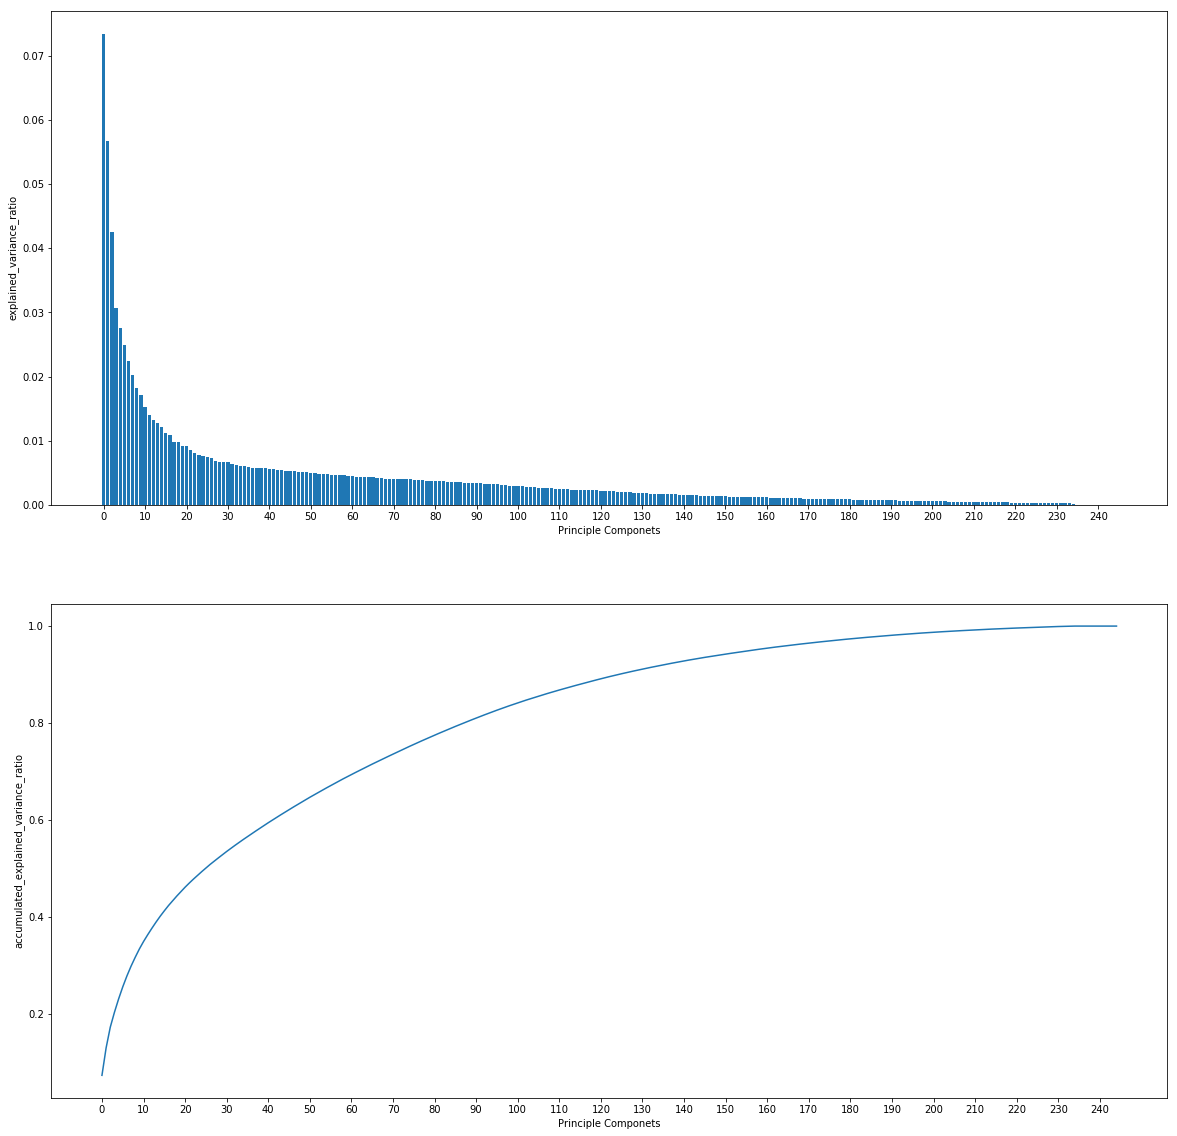

In [46]:
plt.figure(figsize=(20, 20))
plt.subplot(2,1,1)
plt.bar(list(range(len(pca.explained_variance_ratio_))), pca.explained_variance_ratio_)
plt.xlabel('Principle Componets')
plt.ylabel('explained_variance_ratio')
plt.xticks(np.arange(0, len(pca.explained_variance_ratio_)+1, 10))

plt.subplot(2,1,2)
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('Principle Componets')
plt.ylabel('accumulated_explained_variance_ratio')
plt.xticks(np.arange(0, len(pca.explained_variance_ratio_)+1, 10))

In [47]:
# Choose the first 20 components
pca_20 = PCA(n_components = 20)
pca_20.fit(azdias_final_nonan_dummy_scaled)
np.cumsum(pca_20.explained_variance_ratio_) #45.2% variance 

array([0.07341349, 0.13012439, 0.17271128, 0.20336333, 0.23087938,
       0.2558277 , 0.27832519, 0.29861669, 0.31690805, 0.3340852 ,
       0.34938336, 0.36334484, 0.37664702, 0.38938888, 0.40148394,
       0.41272877, 0.42354266, 0.43337013, 0.4431672 , 0.45229093])

Text(0, 0.5, 'accumulated_explained_variance_ratio')

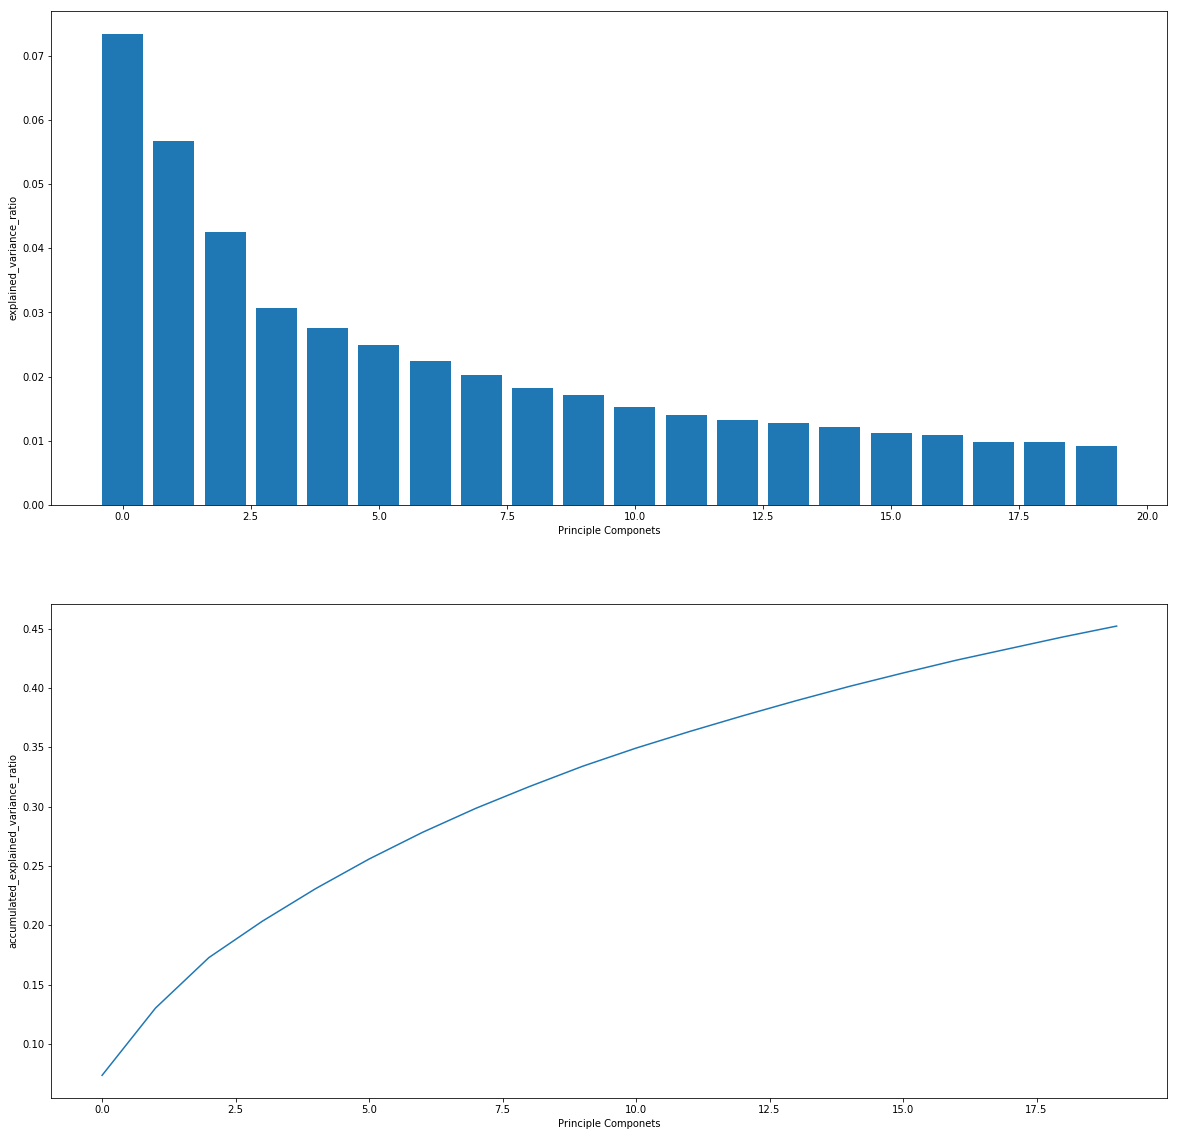

In [48]:
plt.figure(figsize=(20, 20))
plt.subplot(2,1,1)
plt.bar(list(range(len(pca_20.explained_variance_ratio_))), pca_20.explained_variance_ratio_)
plt.xlabel('Principle Componets')
plt.ylabel('explained_variance_ratio')

plt.subplot(2,1,2)
plt.plot(pca_20.explained_variance_ratio_.cumsum())
plt.xlabel('Principle Componets')
plt.ylabel('accumulated_explained_variance_ratio')

In [49]:
# Transform the clean azdias dataset
azdias_final_nonan_dummy_scaled_transformed = pca_20.transform(azdias_final_nonan_dummy_scaled)
azdias_final_nonan_dummy_scaled_transformed

array([[ 1.41767276,  4.83855506, -4.60601388, ..., -1.67808435,
         0.89067381,  0.24331666],
       [ 2.80648858,  0.89194289,  0.495497  , ..., -1.21240003,
        -0.61789774, -1.97588523],
       [ 4.70114152, -2.81184069,  2.12823767, ...,  0.35145242,
         0.40472864, -0.37894937],
       ...,
       [ 2.25558967, -0.87821255, -4.87600961, ..., -2.1002567 ,
         0.19981415, -1.52747766],
       [-7.74654902,  1.4482629 , -5.55566826, ..., -1.34431619,
         1.60463866, -0.63168734],
       [ 1.35239232, -1.64463272,  1.28815972, ...,  1.25956056,
         1.36031156,  2.02907329]])

In [50]:
main_comps_20 = pd.DataFrame({'features': azdias_final_nonan_dummy_scaled.columns,
              'comp1': pca_20.components_.transpose()[:,0],
              'comp2': pca_20.components_.transpose()[:,1],
              'comp3': pca_20.components_.transpose()[:,2],
              'comp4': pca_20.components_.transpose()[:,3],
              'comp5': pca_20.components_.transpose()[:,4],
              'comp6': pca_20.components_.transpose()[:,5],
              'comp7': pca_20.components_.transpose()[:,6],
              'comp8': pca_20.components_.transpose()[:,7],
              'comp9': pca_20.components_.transpose()[:,8],
              'comp10': pca_20.components_.transpose()[:,9],
              'comp11': pca_20.components_.transpose()[:,10],
              'comp12': pca_20.components_.transpose()[:,11],
              'comp13': pca_20.components_.transpose()[:,12],
              'comp14': pca_20.components_.transpose()[:,13],
              'comp15': pca_20.components_.transpose()[:,14],
              'comp16': pca_20.components_.transpose()[:,15],
              'comp17': pca_20.components_.transpose()[:,16],
              'comp18': pca_20.components_.transpose()[:,17],
              'comp19': pca_20.components_.transpose()[:,18],
              'comp20': pca_20.components_.transpose()[:,19]})

main_comps_20.sort_values(by='comp1', ascending=False)


,features,comp1,comp2,comp3,comp4,comp5,comp6,comp7,comp8,comp9,...,comp11,comp12,comp13,comp14,comp15,comp16,comp17,comp18,comp19,comp20
117,KBA13_HERST_BMW_BENZ,0.135709,0.146230,-0.007548,-0.052697,0.006004,0.002373,-0.011429,-0.083689,-0.019570,...,-0.040588,-0.065293,0.014759,0.006863,-0.059764,-0.012545,0.080844,0.010420,0.033930,-0.021283
156,KBA13_SEG_GELAENDEWAGEN,0.122356,-0.023266,-0.030836,-0.033240,-0.005834,0.018813,-0.051042,-0.012356,0.021582,...,-0.042487,0.048822,-0.057501,-0.031852,-0.048850,-0.067615,0.089281,-0.030688,-0.033935,0.016765
150,KBA13_MERCEDES,0.122279,0.117585,-0.011082,-0.065082,0.008038,0.013464,0.004632,-0.099742,-0.028807,...,-0.036526,-0.053117,0.023319,0.005244,-0.018531,-0.007199,0.030086,0.011104,0.018494,-0.039690
182,PLZ8_ANTG1,0.120761,-0.154525,-0.043757,-0.019278,-0.020786,0.030134,-0.038044,-0.036463,-0.026229,...,-0.027269,-0.026150,-0.037032,-0.007407,0.043291,-0.038095,0.012022,-0.004391,-0.002513,-0.038223
21,MOBI_REGIO,0.115168,-0.161189,-0.028263,0.001507,0.003763,0.008906,0.037902,0.078300,-0.007158,...,-0.067782,-0.005586,0.053288,-0.008820,-0.001336,-0.017215,-0.023491,0.023576,-0.051065,-0.103193
61,KBA05_HERST1,0.113943,0.079742,-0.003500,-0.039242,0.013276,-0.060316,0.135016,0.056553,0.049375,...,-0.107567,-0.064878,-0.096186,0.064795,0.059951,0.055560,-0.022516,-0.052673,0.042442,0.016011
32,KBA05_MOTOR,0.112642,0.052392,-0.014765,-0.016761,0.000236,-0.109838,0.161187,0.084716,0.047075,...,0.002676,0.004537,-0.082830,0.026339,0.040354,0.006696,-0.004571,0.023116,0.026575,0.033322
73,KBA05_KW3,0.112273,0.067377,0.003256,-0.005371,0.013341,-0.015866,0.115935,0.103470,0.053855,...,-0.131816,0.009489,-0.096625,0.082236,0.055400,0.052107,-0.063044,-0.049098,-0.046924,0.031621
173,KBA13_SITZE_6,0.109973,-0.006475,-0.062581,-0.152065,-0.002047,-0.032383,-0.035347,-0.059699,-0.071141,...,0.108252,-0.002721,-0.011758,0.018638,0.008091,0.060708,-0.008955,-0.059198,0.032160,0.053007
126,KBA13_KMH_211,0.109398,0.093321,0.003067,0.050476,-0.014562,-0.020436,-0.127342,-0.004393,0.160920,...,-0.020350,0.010571,0.052417,-0.057922,-0.086345,-0.131278,-0.157263,0.018312,0.029029,-0.015607


In [51]:
#Choose the top five variables that contribute most to comp1
main_comps_20.sort_values(by = 'comp1', ascending = False)['features'].tolist()[:5]

['KBA13_HERST_BMW_BENZ',
 'KBA13_SEG_GELAENDEWAGEN',
 'KBA13_MERCEDES',
 'PLZ8_ANTG1',
 'MOBI_REGIO']

In [52]:
#Pull the top 5 variables contributed most for each factor
fa_components = {}
for factor in main_comps_20.columns[1:]:
    fa_components[factor] = main_comps_20.sort_values(by = factor, ascending = False)['features'].tolist()[:5]
fa_components = pd.DataFrame(fa_components)
fa_components

,comp1,comp2,comp3,comp4,comp5,comp6,comp7,comp8,comp9,comp10,comp11,comp12,comp13,comp14,comp15,comp16,comp17,comp18,comp19,comp20
0,KBA13_HERST_BMW_BENZ,EWDICHTE,ALTERSKATEGORIE_GROB,KBA13_VORB_0,SEMIO_VERT,KBA05_SEG2,KBA13_ALTERHALTER_61,KBA13_ALTERHALTER_45,KBA13_KMH_0_140,KBA13_HERST_AUDI_VW,KBA05_KW2,KBA05_MOD8,ANZ_PERSONEN,KBA05_MAXBJ,KBA13_VORB_0,KBA13_KMH_0_140,KBA13_KW_61_120,KBA05_SEG9,KBA13_HERST_EUROPA,ANZ_HAUSHALTE_AKTIV
1,KBA13_SEG_GELAENDEWAGEN,ORTSGR_KLS9,FINANZ_VORSORGER,KBA13_KW_61_120,SEMIO_SOZ,KBA05_KRSKLEIN,KBA13_HALTER_66,KBA13_HALTER_40,KBA13_KMH_211,KBA13_VW,KBA05_SEG9,KBA05_SEG9,LP_FAMILIE_GROB_5.0,KBA05_MAXBJ,KBA13_KRSZUL_NEU,KBA13_KMH_140,KBA13_PEUGEOT,KBA05_MOD8,KBA05_SEG4,HEALTH_TYP_2.0
2,KBA13_MERCEDES,PLZ8_ANTG3,SEMIO_ERL,KBA13_SITZE_5,SEMIO_FAM,KBA05_CCM1,KBA05_MOTOR,KBA13_HALTER_35,KBA13_KMH_250,KBA05_HERST2,KBA05_MOD8,KBA05_SEG10,ONLINE_AFFINITAET,KBA13_BJ_2000,KBA13_BJ_2008,KBA13_KW_30,KBA13_SITZE_4,KBA05_KRSVAN,KBA05_MOD2,ANZ_PERSONEN
3,PLZ8_ANTG1,PLZ8_ANTG4,ZABEOTYP_3.0,KBA13_KRSZUL_NEU,SEMIO_KULT,KBA05_MOD4,KBA05_KW2,KBA13_HALTER_30,KBA13_KW_30,KBA13_KRSHERST_AUDI_VW,KBA13_SEG_VAN,KBA05_KRSVAN,KBA13_BJ_2000,KBA05_MOD4,KBA13_BJ_2009,KBA13_KW_61_120,KBA13_KMH_140_210,HEALTH_TYP_3.0,KBA13_FIAT,FINANZ_HAUSBAUER
4,MOBI_REGIO,KBA13_HERST_BMW_BENZ,SEMIO_LUST,KBA13_HALTER_25,FINANZ_MINIMALIST,KBA13_SEG_KLEINST,KBA05_HERST1,KBA13_ALTERHALTER_30,KBA13_KMH_140,KBA05_KRSHERST2,KBA13_SEG_GROSSRAUMVANS,KBA13_KRSSEG_OBER,KBA13_BJ_1999,KBA05_KRSKLEIN,KBA13_KRSSEG_VAN,KBA13_KMH_110,KBA13_HERST_EUROPA,KBA05_SEG10,KBA05_HERST4,LP_FAMILIE_GROB_5.0


In [53]:
# define a function to print easily
def get_features_comp(comp_number):
    comp = eval("'comp' + cp", {'cp': str(comp_number)})
    sorted_loadings = main_comps_20.sort_values(by=comp, ascending=False)
    return sorted_loadings[[comp, 'features']]
get_features_comp(1).head(5)

,comp1,features
117,0.135709,KBA13_HERST_BMW_BENZ
156,0.122356,KBA13_SEG_GELAENDEWAGEN
150,0.122279,KBA13_MERCEDES
182,0.120761,PLZ8_ANTG1
21,0.115168,MOBI_REGIO


In [54]:
attribute_inf.head(5)

,Information level,Attribute,Description,Additional notes
0,Person,AGER_TYP,best-ager typology,in cooperation with Kantar TNS; the informatio...
1,Person,ALTERSKATEGORIE_GROB,age through prename analysis,modelled on millions of first name-age-referen...
2,Person,ANREDE_KZ,gender,modelled on millions of first name-age-referen...
3,Person,CJT_GESAMTTYP,Customer-Journey-Typology relating to the pref...,"relating to the preferred information, marketi..."
4,Person,FINANZ_MINIMALIST,financial typology: low financial interest,Gfk-Typology based on a representative househo...


In [55]:
# Show the fisr 10 features and description per componet
for i in range(1, 21):
    display(pd.merge(get_features_comp(i).head(5), attribute_inf, left_on='features', right_on = 'Attribute').iloc[:, [0,1,4]])

,comp1,features,Description
0,0.135709,KBA13_HERST_BMW_BENZ,share of BMW & Mercedes Benz within the PLZ8
1,0.122356,KBA13_SEG_GELAENDEWAGEN,share of allterrain within the PLZ8
2,0.122279,KBA13_MERCEDES,share of MERCEDES within the PLZ8
3,0.120761,PLZ8_ANTG1,number of 1-2 family houses in the PLZ8
4,0.115168,MOBI_REGIO,moving patterns


,comp2,features,Description
0,0.199986,EWDICHTE,density of inhabitants per square kilometer
1,0.187186,ORTSGR_KLS9,classified number of inhabitants
2,0.165787,PLZ8_ANTG3,number of 6-10 family houses in the PLZ8
3,0.159940,PLZ8_ANTG4,number of >10 family houses in the PLZ8
4,0.146230,KBA13_HERST_BMW_BENZ,share of BMW & Mercedes Benz within the PLZ8


,comp3,features,Description
0,0.226949,ALTERSKATEGORIE_GROB,age through prename analysis
1,0.218208,FINANZ_VORSORGER,financial typology: be prepared
2,0.198290,SEMIO_ERL,affinity indicating in what way the person is ...
3,0.168710,SEMIO_LUST,affinity indicating in what way the person is ...


,comp4,features,Description
0,0.170610,KBA13_VORB_0,share of cars with no preowner - PLZ8
1,0.165880,KBA13_KW_61_120,share of cars with an engine power between 61 ...
2,0.154012,KBA13_SITZE_5,number of cars with 5 seats in the PLZ8
3,0.124755,KBA13_KRSZUL_NEU,share of newbuilt cars (referred to the county...
4,0.124416,KBA13_HALTER_25,share of car owners between 21 and 25 within t...


,comp5,features,Description
0,0.320330,SEMIO_VERT,affinity indicating in what way the person is ...
1,0.245247,SEMIO_SOZ,affinity indicating in what way the person is ...
2,0.233023,SEMIO_FAM,affinity indicating in what way the person is ...
3,0.222824,SEMIO_KULT,affinity indicating in what way the person is ...
4,0.162394,FINANZ_MINIMALIST,financial typology: low financial interest


,comp6,features,Description
0,0.231074,KBA05_SEG2,share of small and very small cars (Ford Fiest...
1,0.213473,KBA05_KRSKLEIN,share of small cars (referred to the county av...
2,0.204056,KBA05_CCM1,share of cars with less than 1399ccm
3,0.177802,KBA05_MOD4,share of small cars (in an AZ specific definit...
4,0.162889,KBA13_SEG_KLEINST,share of very small cars (Ford Ka etc.) in the...


,comp7,features,Description
0,0.171718,KBA13_ALTERHALTER_61,share of car owners elder than 60 within the PLZ8
1,0.167121,KBA13_HALTER_66,share of car owners over 66 within the PLZ8
2,0.161187,KBA05_MOTOR,most common engine size in the microcell
3,0.143714,KBA05_KW2,share of cars with an engine power between 60 ...
4,0.135016,KBA05_HERST1,"share of top German manufacturer (Mercedes, BMW)"


,comp8,features,Description
0,0.224460,KBA13_ALTERHALTER_45,share of car owners between 31 and 45 within t...
1,0.205479,KBA13_HALTER_40,share of car owners between 36 and 40 within t...
2,0.199020,KBA13_HALTER_35,share of car owners between 31 and 35 within t...
3,0.176750,KBA13_HALTER_30,share of car owners between 26 and 30 within t...
4,0.164358,KBA13_ALTERHALTER_30,share of car owners below 31 within the PLZ8


,comp9,features,Description
0,0.164465,KBA13_KMH_0_140,share of cars with max speed 140 km/h within t...
1,0.160920,KBA13_KMH_211,share of cars with a greater max speed than 21...
2,0.158938,KBA13_KMH_250,share of cars with max speed between 210 and 2...
3,0.156278,KBA13_KW_30,share of cars up to 30 KW engine power - PLZ8
4,0.150326,KBA13_KMH_140,share of cars with max speed between 110 km/h ...


,comp10,features,Description
0,0.279306,KBA13_HERST_AUDI_VW,share of Volkswagen & Audi within the PLZ8
1,0.266174,KBA13_VW,share of VOLKSWAGEN within the PLZ8
2,0.245565,KBA05_HERST2,share of Volkswagen-Cars (including Audi)
3,0.234419,KBA13_KRSHERST_AUDI_VW,share of Volkswagen (referred to the county av...
4,0.204725,KBA05_KRSHERST2,share of Volkswagen (reffered to the county av...


,comp11,features,Description
0,0.216743,KBA05_KW2,share of cars with an engine power between 60 ...
1,0.183348,KBA05_SEG9,share of vans in the microcell
2,0.166588,KBA05_MOD8,share of vans (in an AZ specific definition)
3,0.164868,KBA13_SEG_VAN,share of vans within the PLZ8
4,0.161820,KBA13_SEG_GROSSRAUMVANS,share of big sized vans within the PLZ8


,comp12,features,Description
0,0.197860,KBA05_MOD8,share of vans (in an AZ specific definition)
1,0.195811,KBA05_SEG9,share of vans in the microcell
2,0.195013,KBA05_SEG10,"share of more specific cars (Vans, convertable..."
3,0.189543,KBA05_KRSVAN,share of vans (referred to the county average)
4,0.171191,KBA13_KRSSEG_OBER,share of upper class cars (referred to the cou...


,comp13,features,Description
0,0.283078,ANZ_PERSONEN,number of persons known in this household
1,0.186822,ONLINE_AFFINITAET,online affinity
2,0.147016,KBA13_BJ_2000,share of cars built between 2000 and 2003 with...
3,0.123751,KBA13_BJ_1999,share of cars built between 1995 and 1999 with...


,comp14,features,Description
0,0.166585,KBA05_MAXBJ,most common age of the cars in the microcell
1,0.166585,KBA05_MAXBJ,most common age of the cars in the microcell
2,0.147007,KBA13_BJ_2000,share of cars built between 2000 and 2003 with...
3,0.143424,KBA05_MOD4,share of small cars (in an AZ specific definit...
4,0.142076,KBA05_KRSKLEIN,share of small cars (referred to the county av...


,comp15,features,Description
0,0.271000,KBA13_VORB_0,share of cars with no preowner - PLZ8
1,0.243113,KBA13_KRSZUL_NEU,share of newbuilt cars (referred to the county...
2,0.207707,KBA13_BJ_2008,share of cars built in 2008 within the PLZ8
3,0.189365,KBA13_BJ_2009,share of cars built in 2009 within the PLZ8
4,0.163094,KBA13_KRSSEG_VAN,share of vans (referred to the county average)...


,comp16,features,Description
0,0.290797,KBA13_KMH_0_140,share of cars with max speed 140 km/h within t...
1,0.263731,KBA13_KMH_140,share of cars with max speed between 110 km/h ...
2,0.261269,KBA13_KW_30,share of cars up to 30 KW engine power - PLZ8
3,0.247361,KBA13_KW_61_120,share of cars with an engine power between 61 ...
4,0.236274,KBA13_KMH_110,share of cars with max speed 110 km/h within t...


,comp17,features,Description
0,0.188934,KBA13_KW_61_120,share of cars with an engine power between 61 ...
1,0.165900,KBA13_PEUGEOT,share of PEUGEOT within the PLZ8
2,0.155577,KBA13_SITZE_4,number of cars with less than 5 seats in the PLZ8
3,0.148236,KBA13_KMH_140_210,share of cars with max speed between 140 and 2...
4,0.129624,KBA13_HERST_EUROPA,share of European cars within the PLZ8


,comp18,features,Description
0,0.207748,KBA05_SEG9,share of vans in the microcell
1,0.201039,KBA05_MOD8,share of vans (in an AZ specific definition)
2,0.185758,KBA05_KRSVAN,share of vans (referred to the county average)
3,0.149410,KBA05_SEG10,"share of more specific cars (Vans, convertable..."


,comp19,features,Description
0,0.259239,KBA13_HERST_EUROPA,share of European cars within the PLZ8
1,0.224988,KBA05_SEG4,share of middle class cars (Ford Mondeo etc.) ...
2,0.205212,KBA05_MOD2,share of middle class cars (in an AZ specific ...
3,0.178352,KBA13_FIAT,share of FIAT within the PLZ8
4,0.159867,KBA05_HERST4,"share of European manufacturer (e.g. Fiat, Peu..."


,comp20,features,Description
0,0.166406,ANZ_HAUSHALTE_AKTIV,number of households known in this building
1,0.156242,ANZ_PERSONEN,number of persons known in this household
2,0.155575,FINANZ_HAUSBAUER,financial typology: main focus is the own house


In [56]:
#Refactoring the process of factor analysis 
def factor_analysis(dataset, n = 20):
    '''Conduct factor analysis with specified dataset and n_components.
    INPUT: Dataset to be factor analyzed
            n: number of factors
    OUTPUT: Graphs to represent the variances explained by each factor and the accumulated 
            variance.
            A dataframe which is transformed using FA.'''
    dataset_final_nonan_dummy_scaled =  data_clean(dataset)
    pca = PCA(n)
    pca.fit(dataset_final_nonan_dummy_scaled)
    pca.explained_variance_ratio_
    print(np.cumsum(pca.explained_variance_ratio_))
    dataset_final_nonan_dummy_scaled_transformed = pca.transform(dataset_final_nonan_dummy_scaled)
    
    plt.figure(figsize=(20, 20))
    plt.subplot(2,1,1)
    plt.bar(list(range(len(pca.explained_variance_ratio_))), pca.explained_variance_ratio_)
    plt.xlabel('Principle Components')
    plt.ylabel('explained_variance_ratio')
    plt.xticks(np.arange(0, len(pca.explained_variance_ratio_)+1, 5))
    
    plt.subplot(2,1,2)
    plt.plot(pca.explained_variance_ratio_.cumsum())
    plt.xlabel('Principle Components')
    plt.ylabel('accumulated_explained_variance_ratio')
    plt.xticks(np.arange(0, len(pca.explained_variance_ratio_)+1, 5))
    
    return dataset_final_nonan_dummy_scaled_transformed

C:\Users\Nancy Zhao\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


The shape of the original dataframe is: (891221, 272).
72.08 % of the original dataset are remained.
The dimension of the dataset after dropping rows and cols with more than 20% missing values is: (737288, 237)


C:\Users\Nancy Zhao\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Nancy Zhao\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


[0.07341784 0.1301359  0.17272295 0.20337534 0.23089017 0.25583835
 0.27833813 0.29862949 0.31692105 0.33409822 0.34939807 0.36336023
 0.3766772  0.38942204 0.40151718 0.41276274 0.42357798 0.43341818
 0.44321954 0.45237842]


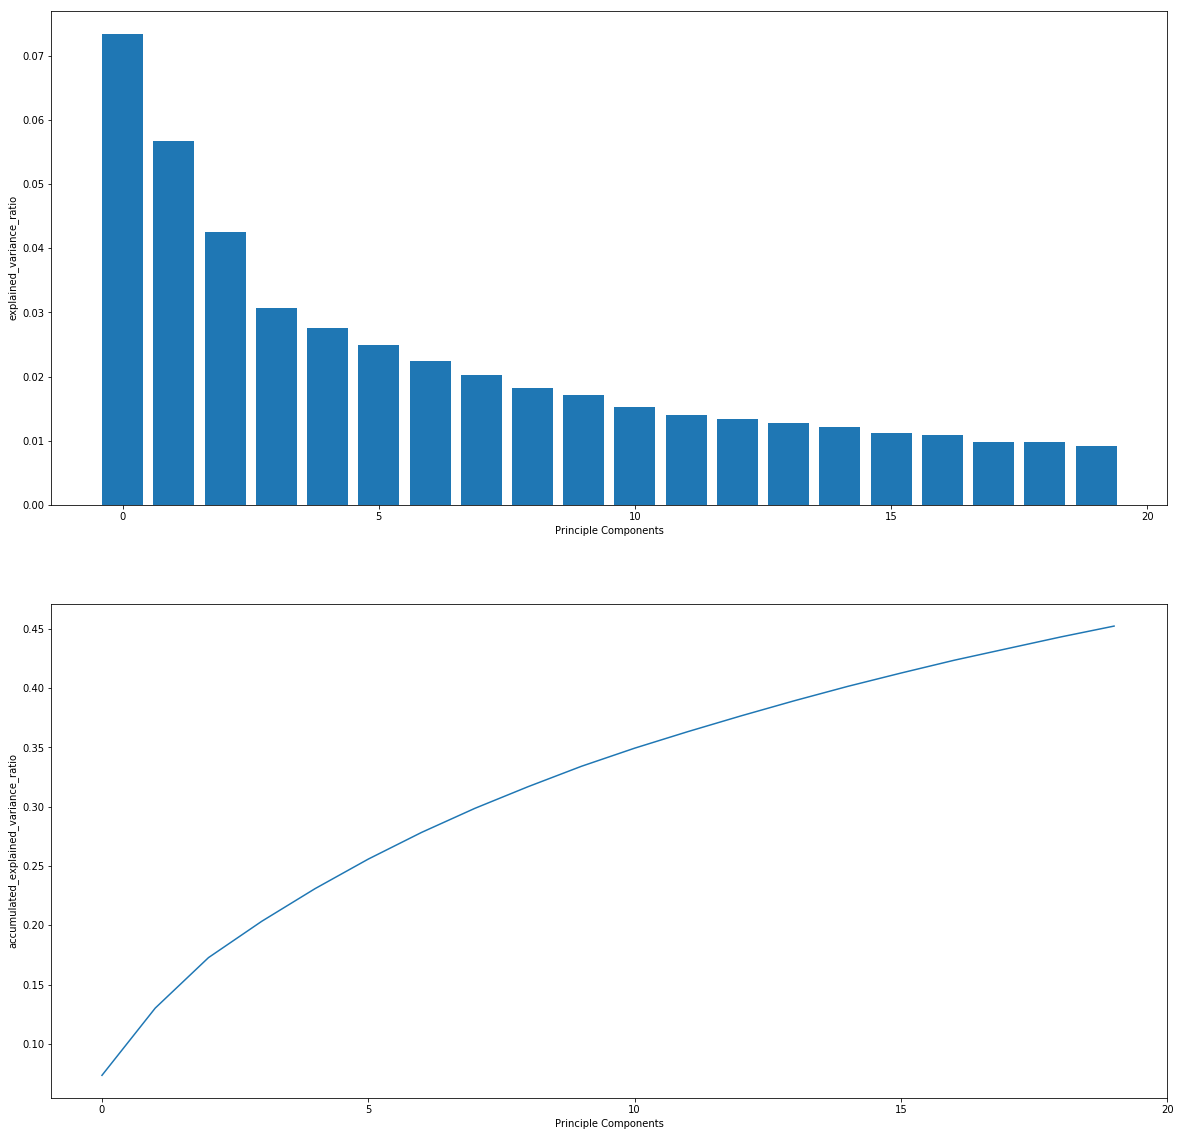

In [57]:
azdias_final_nonan_dummy_scaled_transformed = factor_analysis('azdias')

C:\Users\Nancy Zhao\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


The shape of the original dataframe is: (191652, 369).
60.52 % of the original dataset are remained.
The dimension of the dataset after dropping rows and cols with more than 20% missing values is: (134246, 235)


C:\Users\Nancy Zhao\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Nancy Zhao\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


[0.07292775 0.1300784  0.16090075 0.19090845 0.21666298 0.24063193
 0.26207234 0.28146077 0.29976715 0.31733379 0.33355408 0.34709755
 0.35998208 0.37262609 0.38503992 0.39668017 0.40770507 0.41856722
 0.42912142 0.43897531]


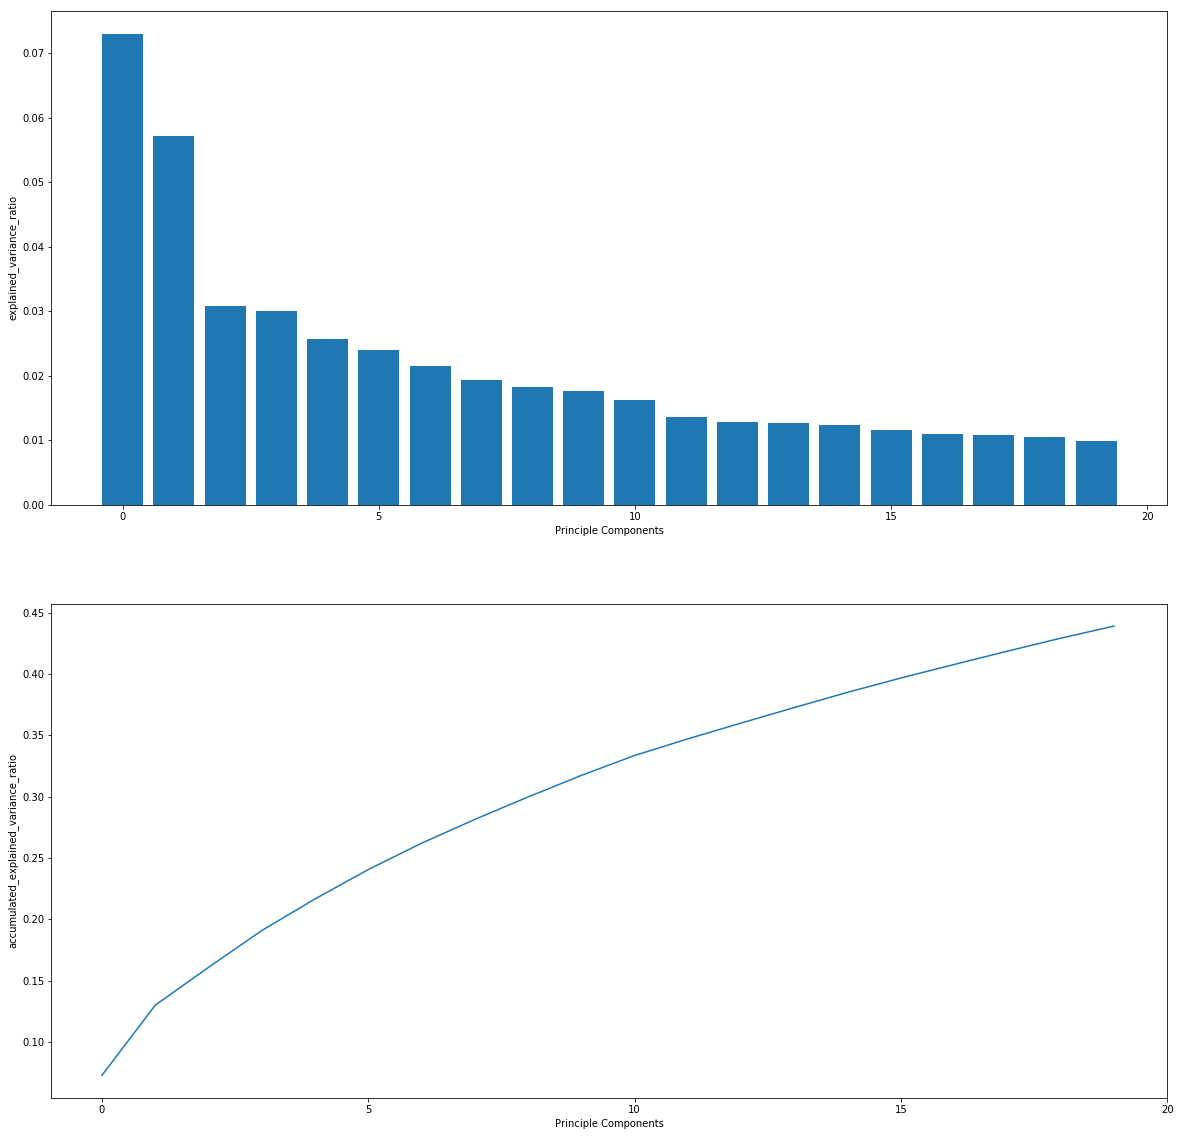

In [58]:
#Perform factor analysis on the customers data as well
customers_final_nonan_dummy_scaled_transformed = factor_analysis('customers')

In [59]:
customers_final_nonan_dummy_scaled_transformed

array([[ 2.01434279, -5.33518364, -2.0576587 , ..., -1.46838644,
        -2.67322665,  1.21272838],
       [ 0.77882411,  3.63617113, -3.05350129, ...,  1.17402458,
         1.72521108,  0.01924324],
       [-1.25229266, -2.35397645, -0.34134006, ...,  1.47163949,
        -0.2510723 , -3.99429286],
       ...,
       [-1.23988344,  1.46523293, -1.62189625, ..., -0.19789999,
         2.97096501, -0.0470931 ],
       [-3.18356259,  4.22792614, -2.31133937, ...,  2.16245453,
         1.11373929,  0.57632091],
       [-2.56399038, -5.96764679,  1.96414183, ...,  0.83757152,
         1.14937118,  1.80754457]])

## Clustering the general population

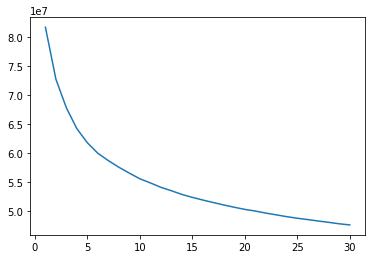

In [93]:
#Since we are not sure how many clusters, therefore,we will loop over a number of clusters.
#This function is extremely time-consuming. It took 2+ hours to run initially. Therefore, I would like to move it
#to the last cell, and move it back to its original place here.

k_list = []
score_list = []
for k in range(1,31):
    #run k-means clustering
    kmeans = KMeans(n_clusters = k)
    model = kmeans.fit(azdias_final_nonan_dummy_scaled_transformed)
    #compute the average within-cluster distances.
    score = model.score(azdias_final_nonan_dummy_scaled_transformed)
    k_list.append(k)
    score_list.append(abs(score))
#use the elbow method to determine the number of clusters (a change of slope from steep to shallow):
plt.plot(k_list, score_list)# very time consuming!!


In [60]:
#Use 8 clusters for azdias as there is a moderate elbow
kmeans = KMeans(8)
kmeans_8_gp = kmeans.fit(azdias_final_nonan_dummy_scaled_transformed)  
general_population_clusters_8 = kmeans_8_gp.predict(azdias_final_nonan_dummy_scaled_transformed)
general_population_clusters_8

array([6, 4, 1, ..., 2, 6, 1])

In [61]:
#Use 8 clusters for customers as well
kmeans_8_cs = kmeans.fit(customers_final_nonan_dummy_scaled_transformed)
customers_clusters_8 = kmeans_8_cs.predict(customers_final_nonan_dummy_scaled_transformed)
customers_clusters_8

array([6, 7, 6, ..., 1, 7, 3])

In [62]:
#comparison for 8 clusters between general population and customers:
gp_clusters_8 = pd.DataFrame(data = general_population_clusters_8, columns = ['flag'])['flag'].value_counts()/len(general_population_clusters_8)
cs_clusters_8 = pd.DataFrame(data = customers_clusters_8, columns = ['flag'])['flag'].value_counts()/len(customers_clusters_8)

Text(0.5, 1.0, 'customer population clusters')

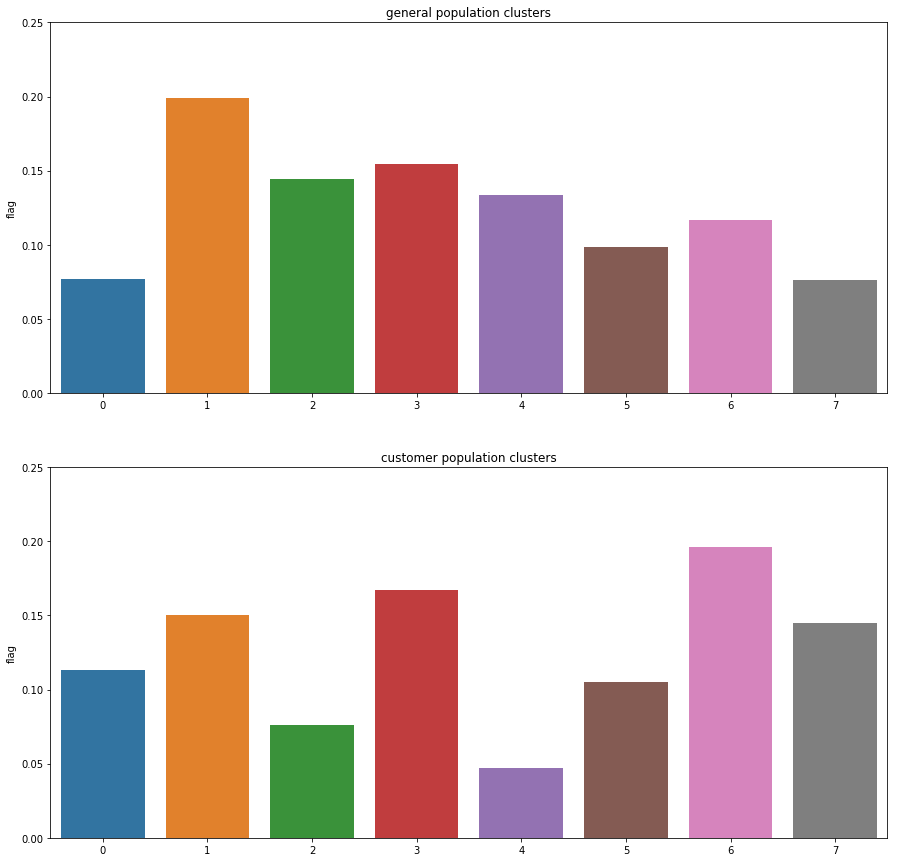

In [63]:
#Draw bar plots:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.barplot(x=gp_clusters_8.index, y=gp_clusters_8)
plt.ylim(0, 0.25)
plt.title('general population clusters')

plt.subplot(2,1,2)
sns.barplot(x=cs_clusters_8.index, y=cs_clusters_8)
plt.ylim(0, 0.25)
plt.title('customer population clusters')

In [64]:
#compare the cluster distribution between general population and customers
gs_cs_comparison = pd.concat([gp_clusters_8, cs_clusters_8], axis = 1, sort = False)
gs_cs_comparison.columns = ['general_population%', 'customer%']
gs_cs_comparison['Proportion_Diff'] =  gs_cs_comparison['general_population%'] - gs_cs_comparison['customer%'] 
gs_cs_comparison.sort_values(by = 'Proportion_Diff', ascending = False)
#Over-represented by general population: cluster 3, 6
#Over-represented by customer population: cluster 0, 2

,general_population%,customer%,Proportion_Diff
4,0.133910,0.047189,0.086720
2,0.144225,0.076136,0.068088
1,0.199097,0.150477,0.048620
5,0.098724,0.105031,-0.006307
3,0.154214,0.166873,-0.012659
0,0.076673,0.113128,-0.036455
7,0.076480,0.144824,-0.068343
6,0.116678,0.196341,-0.079663


In [65]:
#Customers are most presented by Cluster 6. Let's take a detailed look into these two clusters.
#let's use abs 2 as the criterion. Cluster 4 is positively correlated with comp1(share of luxury cars) and negatively related with
#comp2(densed area)
#It seems like target market is more likely to own luxury cars and tends to live in less densed areas.
kmeans_8_cs.cluster_centers_[6,:]

array([ 2.30944998, -2.12167602,  0.45520574, -1.5125073 ,  0.49267729,
       -0.38466557, -0.22184694, -0.15863105, -0.41327661,  0.01453785,
        0.22686864, -0.06844766,  0.0458669 , -0.05706472, -0.23174633,
        0.17107073, -0.16190796, -0.06468722,  0.22374439, -0.06007402])

In [66]:
# Cluster 3: negtivaly correlated with comp1(share of luxury cars) and comp 2 (densed area)
#customers who are less likely to have luxury car and tends to live in less densed area
kmeans_8_cs.cluster_centers_[3,:]

array([-3.53812274, -3.6384245 , -0.33380635,  0.86899558, -0.60651239,
       -1.4001998 ,  0.63666411,  0.22657733,  0.32474544,  0.43931904,
       -0.27995323,  0.22799653,  0.07136891, -0.07454745,  0.15333219,
       -0.28197879, -0.00553807,  0.13450434, -0.37536191,  0.20375681])

In [67]:
#Cluster 1: negatively correlated with comp3(share of luxury car). customers who tend not to have luxury cars or new cars with medium size and eigene power. They also tend not to be young car owners.
np.around(kmeans_8_cs.cluster_centers_[1,:], decimals = 2)

array([-2.08,  0.38,  0.54, -2.75, -0.86,  0.85,  0.22,  0.13, -0.38,
       -0.31,  0.02,  0.14, -0.11,  0.  , -0.09, -0.12, -0.02,  0.12,
        0.16, -0.01])

Thus the target market tends to be mature car owners who live in less densed area. Their cars could be both luxury or not luxry brands, yet their cars are not newly built and less likely to have medium size and eigen power.

In [68]:
#refactoring the process of clustering
def clustering(dataset, k =8, n = 20):
    dataset_nonan_dummy_scaled_transformed = factor_analysis(dataset,n)
    kmeans = KMeans(k)
    model = kmeans.fit(dataset_nonan_dummy_scaled_transformed)  
    dataset_clusters = model.predict(dataset_nonan_dummy_scaled_transformed)
    return dataset_clusters

In [69]:
def clustering_comparison(gpdataset, csdataset, k = 8, n = 20):
    gpdataset_final_nonan_dummy_scaled_transformed = factor_analysis('gpdataset',n)
    csdataset_final_nonan_dummy_scaled_transformed = factor_analysis('csdataset',n)
    
    kmeans = KMeans(k)
    model_gp = kmeans.fit(gpdataset_final_nonan_dummy_scaled_transformed)  
    general_population_clusters = model_gp.predict(gpdataset_final_nonan_dummy_scaled_transformed)
    
    model_cs = kmeans.fit(csdataset_final_nonan_dummy_scaled_transformed)  
    customers_clusters = model_cs.predict(csdataset_final_nonan_dummy_scaled_transformed)
    #convert two clusters into dataframes
    gp_clusters = pd.DataFrame(data = general_population_clusters, columns = ['flag'])['flag'].value_counts()/len(general_population_clusters)
    cs_clusters = pd.DataFrame(data = customers_clusters, columns = ['flag'])['flag'].value_counts()/len(customers_clusters)
    
    #Draw bar plots:
    plt.figure(figsize=(15,15))
    plt.subplot(2,1,1)
    sns.barplot(x=gp_clusters.index, y=gp_clusters)
    plt.ylim(0, 0.25)
    plt.title('General population clusters')
    
    plt.subplot(2,1,2)
    sns.barplot(x=cs_clusters.index, y=cs_clusters)
    plt.ylim(0, 0.25)
    plt.title('Customer population clusters')

## Part 2: Supervised Learning Model
Now that you've found which parts of the population are more likely to be customers of the mail-order company, it's time to build a prediction model. Each of the rows in the "MAILOUT" data files represents an individual that was targeted for a mailout campaign. Ideally, we should be able to use the demographic information from each individual to decide whether or not it will be worth it to include that person in the campaign.

The "MAILOUT" data has been split into two approximately equal parts, each with almost 43 000 data rows. In this part, you can verify your model with the "TRAIN" partition, which includes a column, "RESPONSE", that states whether or not a person became a customer of the company following the campaign. In the next part, you'll need to create predictions on the "TEST" partition, where the "RESPONSE" column has been withheld.

In [70]:
#Get y which is not scaled:
mailout_final_nonan = nom_ord_num_dataset('mailout_train')
mailout_final_nonan.shape #(33837, 211)
mailout_final_nonan.dtypes
mailout_y = mailout_final_nonan['RESPONSE']
len(mailout_y) #33837

C:\Users\Nancy Zhao\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  # Remove the CWD from sys.path while we load stuff.


The shape of the dataframe is: (42962, 367).
There are  272 common columns.
68.95 % of the original dataset are remained.
The dimension of the dataset after dropping rows and cols with more than 20% missing values is: (33837, 239)


33837

In [71]:
#Get x which is scaled and transformed:
mailout_nonan_dummy_scaled = data_clean('mailout_train')
mailout_nonan_dummy_scaled.shape #(33837, 239)
print(mailout_nonan_dummy_scaled.dtypes)

C:\Users\Nancy Zhao\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3214: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


The shape of the original dataframe is: (42962, 367).
68.95 % of the original dataset are remained.
The dimension of the dataset after dropping rows and cols with more than 20% missing values is: (33837, 239)


C:\Users\Nancy Zhao\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


ANREDE_KZ                float64
GREEN_AVANTGARDE         float64
ALTERSKATEGORIE_GROB     float64
EWDICHTE                 float64
KBA05_MAXBJ              float64
KBA05_MAXBJ              float64
WOHNDAUER_2008           float64
INNENSTADT               float64
CAMEO_DEUG_2015          float64
ORTSGR_KLS9              float64
ANZ_HAUSHALTE_AKTIV      float64
ANZ_HH_TITEL             float64
ANZ_PERSONEN             float64
ANZ_TITEL                float64
FINANZ_ANLEGER           float64
FINANZ_HAUSBAUER         float64
FINANZ_MINIMALIST        float64
FINANZ_SPARER            float64
FINANZ_UNAUFFAELLIGER    float64
FINANZ_VORSORGER         float64
HH_EINKOMMEN_SCORE       float64
MOBI_REGIO               float64
KBA05_ALTER1             float64
KBA05_ANHANG             float64
KBA05_AUTOQUOT           float64
KBA05_KRSHERST1          float64
KBA05_KRSHERST2          float64
KBA05_KRSHERST3          float64
KBA05_KRSKLEIN           float64
KBA05_KRSOBER            float64
          

C:\Users\Nancy Zhao\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


C:\Users\Nancy Zhao\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


The shape of the original dataframe is: (42962, 367).
68.95 % of the original dataset are remained.
The dimension of the dataset after dropping rows and cols with more than 20% missing values is: (33837, 239)


C:\Users\Nancy Zhao\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Nancy Zhao\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


[0.07355302 0.1350025  0.16921337 0.20149563 0.22845413 0.25245938
 0.27439801 0.29386949 0.31178111 0.3291473  0.34479118 0.35905554
 0.37211507 0.38458731 0.39675935 0.40799145 0.41871816 0.42920077
 0.4392248  0.44886548]
(33837, 20)


array([[-0.37050317,  6.85322775, -1.22309015, ..., -0.92153236,
        -0.44075293, -0.24905734],
       [-0.04099867, -6.05692418, -0.93215524, ..., -4.22250258,
        -0.35572261,  1.72658025],
       [-2.00353618,  0.8515101 , -1.6453388 , ..., -0.73100928,
        -0.05029744, -2.01840058],
       ...,
       [ 2.27552019, -5.11698855, -1.39829212, ...,  1.69335996,
        -0.36415102, -0.55103132],
       [-1.82813383,  0.72082754, -0.04328992, ...,  2.30104414,
        -2.58431256,  3.80513245],
       [-0.99688572, -2.09862266, -1.86529091, ...,  1.27430234,
        -0.67607878,  0.45084444]])

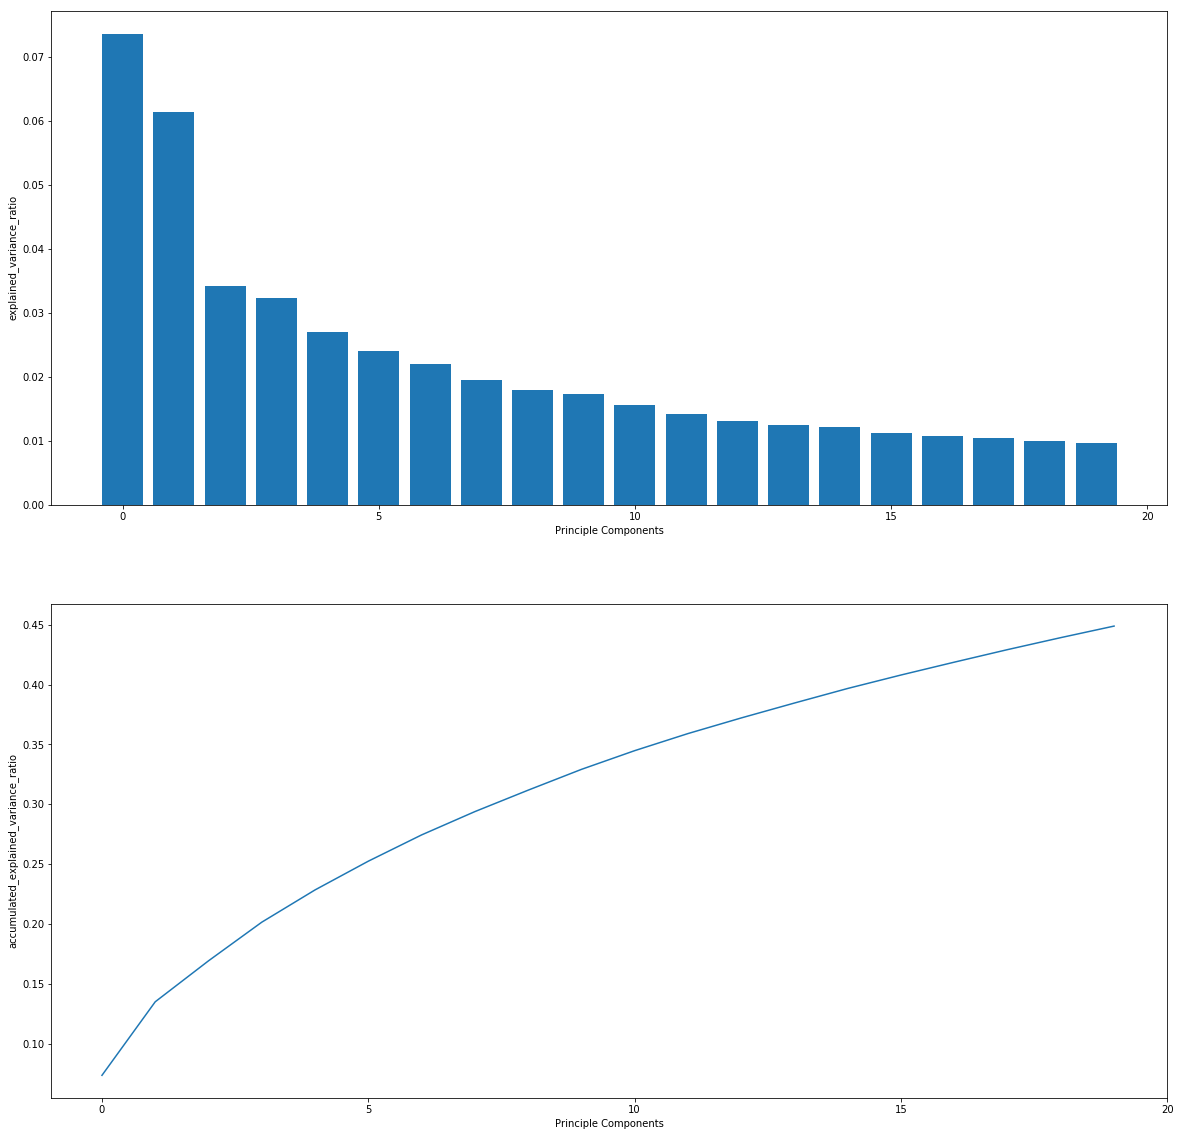

In [72]:
mailout_nocluster_nonan_dummy_scaled = mailout_nonan_dummy_scaled.drop(['RESPONSE'], axis = 1)
mailout_nonan_dummy_scaled_transformed = factor_analysis('mailout_train',n=20)
print(mailout_nonan_dummy_scaled_transformed.shape) #(33837, 20)
mailout_nonan_dummy_scaled_transformed

C:\Users\Nancy Zhao\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  


The shape of the original dataframe is: (42962, 367).
68.95 % of the original dataset are remained.
The dimension of the dataset after dropping rows and cols with more than 20% missing values is: (33837, 239)


C:\Users\Nancy Zhao\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Nancy Zhao\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


[0.07355302 0.1350025  0.16921337 0.20149563 0.22845413 0.25245938
 0.27439801 0.29386949 0.31178111 0.32914728 0.34479115 0.35905544
 0.37211508 0.38458708 0.39675946 0.40799228 0.41871737 0.42920569
 0.43921329 0.44884008]
33837


array([4, 5, 1, ..., 2, 0, 0])

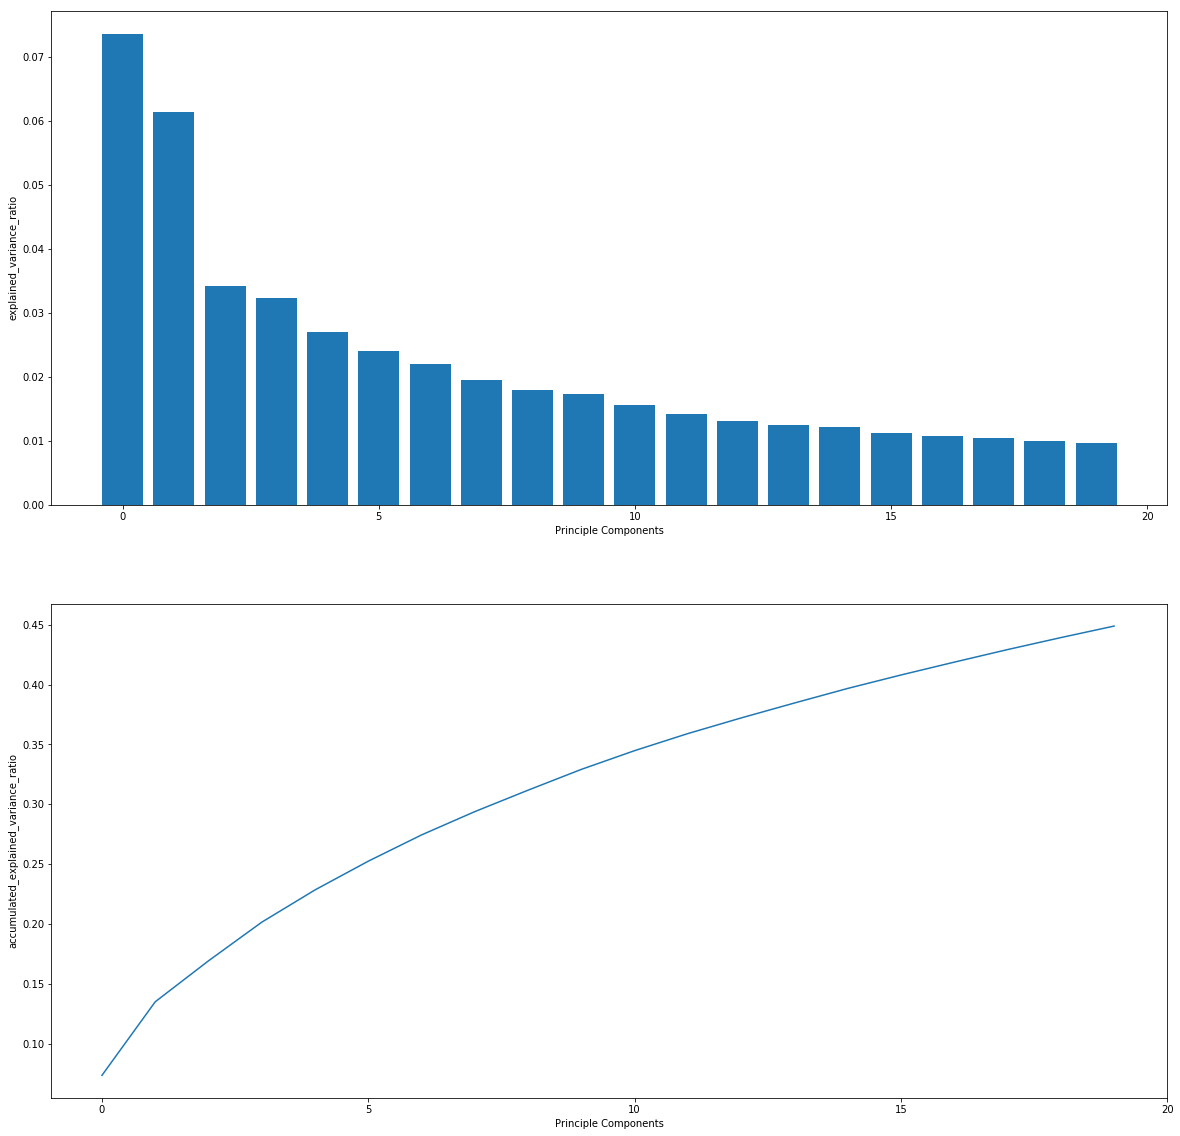

In [73]:
#get clusters:
mailout_clusters = clustering('mailout_train', k = 8, n = 20)
print(len(mailout_clusters)) #33837
mailout_clusters

In [74]:
#Add clusters to the scaled and transformed dataframe
mailout_nonan_dummy_scaled_transformed = pd.DataFrame(mailout_nonan_dummy_scaled_transformed)
mailout_nonan_dummy_scaled_transformed['Cluster'] = mailout_clusters
mailout_nonan_dummy_scaled_transformed.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,Cluster
0,-0.370503,6.853228,-1.223090,-1.693799,1.432295,4.236510,-0.770407,1.934427,0.355724,0.199285,...,2.273151,-2.015033,-0.629007,1.561844,-1.224686,0.683221,-0.921532,-0.440753,-0.249057,4
1,-0.040999,-6.056924,-0.932155,-2.952504,1.743214,1.076655,0.573054,-1.256613,-0.958738,0.602544,...,-2.268484,-0.007145,-0.891987,-0.940019,-2.716405,-0.896105,-4.222503,-0.355723,1.726580,5
2,-2.003536,0.851510,-1.645339,5.699233,-2.426359,1.384571,1.682828,0.714554,4.107678,0.429439,...,1.015375,1.406020,1.187496,0.556894,0.095585,-0.781298,-0.731009,-0.050297,-2.018401,1
3,9.802041,7.189530,-3.242366,-1.512388,-0.672378,-3.598292,1.474034,0.799842,-1.542111,3.580515,...,-1.393833,0.198701,-0.644252,1.536101,0.086976,-1.817812,0.127067,1.715851,-1.843322,3
4,4.264084,5.225229,-0.539723,5.777685,0.279163,2.710548,1.235733,-1.074082,1.088399,0.735125,...,1.264077,1.509466,-1.714463,-1.551133,0.290074,0.017554,-0.789228,0.741694,-0.571836,3


In [75]:
#split the data into train and test subsets
x_train, x_test, y_train, y_test = train_test_split(mailout_nonan_dummy_scaled_transformed, mailout_y, 
                                                    test_size = 0.3, random_state = 42)

In [76]:
x_train.shape #(23685, 21)

(23685, 21)

In [77]:
y_train

21779    0.0
12890    0.0
27907    0.0
17923    0.0
27087    0.0
1687     0.0
1355     0.0
30655    0.0
23728    0.0
18239    0.0
688      0.0
5761     0.0
8768     0.0
32556    0.0
3529     0.0
25607    0.0
17447    0.0
22531    0.0
17167    0.0
22155    0.0
22757    0.0
20069    0.0
29091    0.0
2026     0.0
1527     0.0
33656    0.0
20902    0.0
31489    0.0
8616     0.0
8580     0.0
        ... 
14502    0.0
30740    0.0
3890     0.0
3556     0.0
11394    0.0
31551    0.0
1267     0.0
1899     0.0
19118    0.0
189      0.0
2747     0.0
18431    0.0
18942    0.0
25658    0.0
27480    0.0
6396     0.0
28693    0.0
19769    0.0
17568    0.0
5311     0.0
2433     0.0
769      0.0
1685     0.0
16023    0.0
21962    0.0
16850    0.0
6265     0.0
11284    0.0
860      0.0
15795    0.0
Name: RESPONSE, Length: 23685, dtype: float64

In [78]:
#Create a function for model testing:
def model_eval(model):
    model = model
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(' Accuracy is {:.2f}'.format(accuracy_score(y_test, y_pred))) 
    print(' Precision is {:.2f}'.format(precision_score(y_test, y_pred)))
    print(' Recall is {:.2f}'.format(recall_score(y_test, y_pred)))
    print(' F1 is {:.2f}'.format(f1_score(y_test, y_pred)))

In [79]:
model_eval(model =RandomForestClassifier())
model_eval(model =KNeighborsClassifier())
model_eval(model =LogisticRegression())
model_eval(model =AdaBoostClassifier())

C:\Users\Nancy Zhao\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[10038     0]
 [  114     0]]
 Accuracy is 0.99
 Precision is 0.00
 Recall is 0.00
 F1 is 0.00


C:\Users\Nancy Zhao\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Nancy Zhao\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[[10036     2]
 [  114     0]]
 Accuracy is 0.99
 Precision is 0.00
 Recall is 0.00
 F1 is 0.00


C:\Users\Nancy Zhao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[10038     0]
 [  114     0]]
 Accuracy is 0.99
 Precision is 0.00
 Recall is 0.00
 F1 is 0.00


C:\Users\Nancy Zhao\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Nancy Zhao\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[[10038     0]
 [  114     0]]
 Accuracy is 0.99
 Precision is 0.00
 Recall is 0.00
 F1 is 0.00


C:\Users\Nancy Zhao\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Nancy Zhao\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


## Part 3: Kaggle Competition

Now that you've created a model to predict which individuals are most likely to respond to a mailout campaign, it's time to test that model in competition through Kaggle. If you click on the link [here](http://www.kaggle.com/t/21e6d45d4c574c7fa2d868f0e8c83140), you'll be taken to the competition page where, if you have a Kaggle account, you can enter. If you're one of the top performers, you may have the chance to be contacted by a hiring manager from Arvato or Bertelsmann for an interview!

Your entry to the competition should be a CSV file with two columns. The first column should be a copy of "LNR", which acts as an ID number for each individual in the "TEST" partition. The second column, "RESPONSE", should be some measure of how likely each individual became a customer – this might not be a straightforward probability. As you should have found in Part 2, there is a large output class imbalance, where most individuals did not respond to the mailout. Thus, predicting individual classes and using accuracy does not seem to be an appropriate performance evaluation method. Instead, the competition will be using AUC to evaluate performance. The exact values of the "RESPONSE" column do not matter as much: only that the higher values try to capture as many of the actual customers as possible, early in the ROC curve sweep.

In [80]:
#Create a function to get the LNRs for each remained rows.
def Get_LNR(dataset):
    #1.read and pull common cols:
    df = pd.read_csv(str(dataset)+".csv").drop('Unnamed: 0', axis = 1)
    #Recoding GEBURTSJAHR
    df['GEBURTSJAHR'] = np.where(df['GEBURTSJAHR'] == 0, np.nan,df['GEBURTSJAHR'] )
    df['Age'] = df['GEBURTSJAHR'].apply(lambda x: 2017-x)
    #Recoding CAMEO_DEUG_2015
    df['CAMEO_DEUG_2015'].replace('X', np.nan, inplace = True)
    #convert CAMEO_DEUG_2015 from object to float
    df['CAMEO_DEUG_2015'] = df['CAMEO_DEUG_2015'].astype(float)
    
    #pull the common columns
    common = np.intersect1d(df.columns.values, features_des['Attribute'])
    if dataset == 'mailout_train':
        common_cols = np.append(common ,'RESPONSE')
    if dataset == 'mailout_test':
        common_cols = np.append(common,'LNR')
    else:
        common_cols = common
    dataset_com = df[common_cols]
    
    #2. find out the missing/unknown values for features
    features_missing_unknown = features_des[features_des['Meaning'].str.contains('unknown')|features_des['Meaning'].str.contains('no ')]
    features_missing_unknown = features_missing_unknown[['Attribute', 'Value']]
    #create a dictionary for missing/unknown values
    unknowns = {}
    for attribute in features_missing_unknown['Attribute'].unique():
        unknowns[attribute]= features_missing_unknown[features_missing_unknown['Attribute'] == attribute].Value.tolist()
    dataset_mu = dataset_com.copy()
    for col in dataset_mu.columns:
        if col in unknowns:
            col_mu_values = nan_list_func(col)
            dataset_mu[col].replace(to_replace = col_mu_values, value = np.nan, inplace = True)
      
    #3. Pull columns drop, do not drop any rows:
    na_perc_col = dataset_mu.isnull().sum()/dataset_mu.shape[0]
    drop_columns = dataset_mu.isnull().sum()[na_perc_col > 0.3].index
    #Drop cols
    dataset_dropped = dataset_mu.drop(drop_columns, axis = 1)
   
    return dataset_dropped['LNR']

In [81]:
mailout_test_LNR = Get_LNR('mailout_test')
len(mailout_test_LNR) #len is 42833, no rows were dropped, only the columns.

C:\Users\Nancy Zhao\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3214: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


42833

In [82]:
def Data_MO_Test(dataset, n = 20):
    '''
    Read the dataset and pull the common columns with DIAS Attributes and DIAS Information Levels tables;
    Recode two columns: 'GEBURTSJAHR' and 'CAMEO_DEUG_2015';
    Replace the missing and unknown values of the dataset columns with NaN;
    Drop rows and cols that have more than 20% missing values.
    Prepare the nominal, ordinal, and numeric data which are selected manually,
    replace NaNs with either median or mean.
    
    INPUT: a raw dataset
    OUTPUT: a cleaned dataset which have no nans, all the multi-level nominal variables 
    are dummied, and all the variables are scaled between (0,1).
    '''
    #1.read and pull common cols:
    df = pd.read_csv(str(dataset)+".csv").drop('Unnamed: 0', axis = 1)
    print("The shape of the original dataframe is: "+ str(df.shape) +".")
    
    #Recoding GEBURTSJAHR
    df['GEBURTSJAHR'] = np.where(df['GEBURTSJAHR'] == 0, np.nan,df['GEBURTSJAHR'] )
    df['Age'] = df['GEBURTSJAHR'].apply(lambda x: 2017-x)
    #Recoding CAMEO_DEUG_2015
    df['CAMEO_DEUG_2015'].replace('X', np.nan, inplace = True)
    #convert CAMEO_DEUG_2015 from object to float
    df['CAMEO_DEUG_2015'] = df['CAMEO_DEUG_2015'].astype(float)
    
    #pull the common columns
    common = np.intersect1d(df.columns.values, features_des['Attribute'])
    if dataset == 'mailout_train':
        common_cols = np.append(common ,'RESPONSE')
    else:
        common_cols = common
    dataset_com = df[common_cols]
    
    #2. find out the missing/unknown values for features
    features_missing_unknown = features_des[features_des['Meaning'].str.contains('unknown')|features_des['Meaning'].str.contains('no ')]
    features_missing_unknown = features_missing_unknown[['Attribute', 'Value']]
    #create a dictionary for missing/unknown values
    unknowns = {}
    for attribute in features_missing_unknown['Attribute'].unique():
        unknowns[attribute]= features_missing_unknown[features_missing_unknown['Attribute'] == attribute].Value.tolist()
    dataset_mu = dataset_com.copy()
    for col in dataset_mu.columns:
        if col in unknowns:
            col_mu_values = nan_list_func(col)
            dataset_mu[col].replace(to_replace = col_mu_values, value = np.nan, inplace = True)
      
    #3. Pull columns and rows to drop:
    na_perc_col = dataset_mu.isnull().sum()/dataset_mu.shape[0]
    drop_columns = dataset_mu.isnull().sum()[na_perc_col > 0.3].index
    #Drop cols
    dataset_dropped = dataset_mu.drop(drop_columns, axis = 1)
    
    #4. Prepare nominal, ordinal, and numeric dataset
    #prepare the nominal subset.
    nom_var_list = ['ANREDE_KZ', 'FINANZTYP', 'LP_FAMILIE_GROB','HEALTH_TYP','CJT_GESAMTTYP','RETOURTYP_BK_S', 
                    'SHOPPER_TYP', 'GREEN_AVANTGARDE','ZABEOTYP', 'GEBAEUDETYP']
    dataset_nom = dataset_dropped[nom_var_list].reset_index()
    dataset_nom =  dataset_nom.drop('index', axis = 1)
    #replace missing values with median
    imputer_nom = SimpleImputer(strategy = 'median')
    dataset_nom_nonan = pd.DataFrame(data = imputer_nom.fit_transform(dataset_nom), columns = dataset_nom.columns)
    #convert datatypes to strings:
    for nom_var in nom_var_list:
        dataset_nom_nonan[nom_var] = dataset_nom_nonan[nom_var].astype('str')
    
    #prepare the ordinal subset:
    
    ord_var_list = ['ALTERSKATEGORIE_GROB','EWDICHTE', 'KBA05_MAXBJ', 'KBA05_MAXBJ',
                'WOHNDAUER_2008','INNENSTADT','CAMEO_DEUG_2015','ORTSGR_KLS9']
    dataset_ord = dataset_dropped[ord_var_list]
    #replace the missing values with median
    imputer_ord = SimpleImputer(strategy = 'median')
    dataset_ord_nonan = pd.DataFrame(data = imputer_ord.fit_transform(dataset_ord), columns = dataset_ord.columns)
    
    #prepare the numeric subset:
    #26 delete 'MIN_GEBAEUDEJAHR'
    num_list = ['ANZ_HAUSHALTE_AKTIV','ANZ_HH_TITEL', 'ANZ_PERSONEN', 'ANZ_TITEL','FINANZ_ANLEGER',
                'FINANZ_HAUSBAUER', 'FINANZ_MINIMALIST', 'FINANZ_SPARER','FINANZ_UNAUFFAELLIGER', 'FINANZ_VORSORGER',
                'HH_EINKOMMEN_SCORE','MOBI_REGIO', 'KBA05_ALTER1','KBA05_ANHANG','KBA05_AUTOQUOT',
                'KBA05_KRSHERST1', 'KBA05_KRSHERST2', 'KBA05_KRSHERST3','KBA05_KRSKLEIN', 'KBA05_KRSOBER', 'KBA05_KRSVAN', 'KBA05_KRSZUL',
                'KBA05_MOTOR', 'KBA05_MOTRAD', 'KBA05_SEG1','KBA05_SEG10', 'KBA05_SEG2', 'KBA05_SEG3', 'KBA05_SEG4',
                'KBA05_SEG5', 'KBA05_SEG6', 'KBA05_SEG7', 'KBA05_SEG8','KBA05_SEG9',
                'KBA05_ALTER2','KBA05_ALTER3','KBA05_ALTER4','KBA05_FRAU','KBA05_VORB0','KBA05_VORB1',
                'KBA05_VORB2','KBA05_KRSAQUOT','KBA05_MOD1','KBA05_MOD2','KBA05_MOD3','KBA05_MOD4',
                'KBA05_MOD8','KBA05_ZUL1','KBA05_ZUL2','KBA05_ZUL3','KBA05_ZUL4','KBA05_HERST1','KBA05_HERST2',
                'KBA05_HERST3','KBA05_HERST4','KBA05_HERST5','KBA05_CCM1','KBA05_CCM2','KBA05_CCM3',
                'KBA05_CCM4','KBA05_DIESEL','KBA05_KW1','KBA05_KW2','KBA05_KW3','KBA13_ALTERHALTER_30', 'KBA13_ALTERHALTER_45',
                'KBA13_ALTERHALTER_60', 'KBA13_ALTERHALTER_61', 'KBA13_ANZAHL_PKW',
                'KBA13_AUDI', 'KBA13_AUTOQUOTE', 'KBA13_BJ_1999', 'KBA13_BJ_2000',
               'KBA13_BJ_2004', 'KBA13_BJ_2006', 'KBA13_BJ_2008', 'KBA13_BJ_2009',
               'KBA13_BMW', 'KBA13_CCM_0_1400', 'KBA13_CCM_1000',
               'KBA13_CCM_1200', 'KBA13_CCM_1400', 'KBA13_CCM_1500',
               'KBA13_CCM_1600', 'KBA13_CCM_1800', 'KBA13_CCM_2000',
               'KBA13_CCM_2500', 'KBA13_CCM_2501', 'KBA13_CCM_3000',
               'KBA13_CCM_3001', 'KBA13_FAB_ASIEN', 'KBA13_FAB_SONSTIGE',
               'KBA13_FIAT', 'KBA13_FORD', 'KBA13_HALTER_20', 'KBA13_HALTER_25',
               'KBA13_HALTER_30', 'KBA13_HALTER_35', 'KBA13_HALTER_40',
               'KBA13_HALTER_45', 'KBA13_HALTER_50', 'KBA13_HALTER_55',
               'KBA13_HALTER_60', 'KBA13_HALTER_65', 'KBA13_HALTER_66',
               'KBA13_HERST_ASIEN', 'KBA13_HERST_AUDI_VW', 'KBA13_HERST_BMW_BENZ',
               'KBA13_HERST_EUROPA', 'KBA13_HERST_FORD_OPEL', 'KBA13_HERST_SONST',
               'KBA13_KMH_0_140', 'KBA13_KMH_110', 'KBA13_KMH_140',
               'KBA13_KMH_140_210', 'KBA13_KMH_180', 'KBA13_KMH_211',
               'KBA13_KMH_250', 'KBA13_KMH_251', 'KBA13_KRSAQUOT',
               'KBA13_KRSHERST_AUDI_VW', 'KBA13_KRSHERST_BMW_BENZ',
               'KBA13_KRSHERST_FORD_OPEL', 'KBA13_KRSSEG_KLEIN',
               'KBA13_KRSSEG_OBER', 'KBA13_KRSSEG_VAN', 'KBA13_KRSZUL_NEU',
               'KBA13_KW_0_60', 'KBA13_KW_110', 'KBA13_KW_120', 'KBA13_KW_121',
               'KBA13_KW_30', 'KBA13_KW_40', 'KBA13_KW_50', 'KBA13_KW_60',
               'KBA13_KW_61_120', 'KBA13_KW_70', 'KBA13_KW_80', 'KBA13_KW_90',
               'KBA13_MAZDA', 'KBA13_MERCEDES', 'KBA13_MOTOR', 'KBA13_NISSAN',
               'KBA13_OPEL', 'KBA13_PEUGEOT', 'KBA13_RENAULT',
               'KBA13_SEG_GELAENDEWAGEN', 'KBA13_SEG_GROSSRAUMVANS',
               'KBA13_SEG_KLEINST', 'KBA13_SEG_KLEINWAGEN',
               'KBA13_SEG_KOMPAKTKLASSE', 'KBA13_SEG_MINIVANS',
               'KBA13_SEG_MINIWAGEN', 'KBA13_SEG_MITTELKLASSE',
               'KBA13_SEG_OBEREMITTELKLASSE', 'KBA13_SEG_OBERKLASSE',
               'KBA13_SEG_SONSTIGE', 'KBA13_SEG_SPORTWAGEN',
               'KBA13_SEG_UTILITIES', 'KBA13_SEG_VAN', 'KBA13_SEG_WOHNMOBILE',
               'KBA13_SITZE_4', 'KBA13_SITZE_5', 'KBA13_SITZE_6', 'KBA13_TOYOTA',
               'KBA13_VORB_0', 'KBA13_VORB_1', 'KBA13_VORB_1_2', 'KBA13_VORB_2',
               'KBA13_VORB_3', 'KBA13_VW','ONLINE_AFFINITAET', 'PLZ8_ANTG1', 'PLZ8_ANTG2',
               'PLZ8_ANTG3', 'PLZ8_ANTG4','SEMIO_DOM',
               'SEMIO_ERL', 'SEMIO_FAM', 'SEMIO_KAEM', 'SEMIO_KRIT', 'SEMIO_KULT',
               'SEMIO_LUST', 'SEMIO_MAT', 'SEMIO_PFLICHT', 'SEMIO_RAT',
               'SEMIO_REL', 'SEMIO_SOZ', 'SEMIO_TRADV', 'SEMIO_VERT', 'W_KEIT_KIND_HH','RELAT_AB'] 

    if dataset == 'mailout_train':
        num_var_list = np.append(num_list,'RESPONSE')
    else:
        num_var_list = num_list
                
    dataset_num = dataset_dropped[num_var_list]
    #replace missing values with means
    imputer_num = SimpleImputer(strategy = 'mean')
    dataset_num_nonan = pd.DataFrame(data = imputer_num.fit_transform(dataset_num), columns = dataset_num.columns)
    
    #concate all three subsets:
    dataset_final_nonan = pd.concat([dataset_nom_nonan,dataset_ord_nonan, dataset_num_nonan], axis = 1, sort = False)
    
    #5. scale 
    #identify the nominal variables to dummy
    cat_to_dummy = dataset_final_nonan.dtypes[dataset_final_nonan.dtypes == object].index.tolist()
    cat_to_dummy.remove('ANREDE_KZ')
    cat_to_dummy.remove('GREEN_AVANTGARDE')
    dataset_cat_dummy = pd.get_dummies(dataset_final_nonan[cat_to_dummy])
    dataset_final_nonan_dummy =  pd.concat([dataset_final_nonan.drop(cat_to_dummy, axis = 1),dataset_cat_dummy], axis = 1, sort = False)
    scale = StandardScaler()
    dataset_final_nonan_dummy_scaled = pd.DataFrame(data = scale.fit_transform(dataset_final_nonan_dummy), columns = dataset_final_nonan_dummy.columns)
    
    #6. factor analysis to transform dataset
    pca = PCA(n)
    pca.fit(dataset_final_nonan_dummy_scaled)
    pca.explained_variance_ratio_
    np.cumsum(pca.explained_variance_ratio_) 
    dataset_final_nonan_dummy_scaled_transformed = pca.transform(dataset_final_nonan_dummy_scaled)
    #add column names
    mailout_columns = {}
    for i in range(n):
        mailout_columns[i] = "Factor_"+ str(i+1)
    dataset_final_nonan_dummy_scaled_transformed = pd.DataFrame(dataset_final_nonan_dummy_scaled_transformed, columns = mailout_columns)
    return dataset_final_nonan_dummy_scaled_transformed

In [83]:
def clustering_MO_test(dataset, k =8, n = 20):
    dataset_nonan_dummy_scaled_transformed = Data_MO_Test(dataset,n)
    kmeans = KMeans(k)
    model = kmeans.fit(dataset_nonan_dummy_scaled_transformed)  
    dataset_clusters = model.predict(dataset_nonan_dummy_scaled_transformed)
    return dataset_clusters

In [84]:
mailout_test_nonan_dummy_scaled_transformed = Data_MO_Test('mailout_test',n=20)
mailout_test_nonan_dummy_scaled_transformed.shape #(42833, 20)

The shape of the original dataframe is: (42833, 366).


C:\Users\Nancy Zhao\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Nancy Zhao\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(42833, 20)

In [85]:
mailout_test_nonan_dummy_scaled_transformed.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,7.903953,3.689194,-3.782259,3.008317,3.672796,1.113215,-1.019596,3.025469,-1.286429,0.545602,1.328518,-6.048162,0.430964,1.549552,0.926742,-1.845496,-0.146186,0.497725,-0.995851,-0.136617
1,0.065402,2.892292,-1.567330,-2.023380,1.911537,5.382518,-0.824557,-0.656966,-2.267622,2.064461,0.563188,0.337205,-3.179525,-1.343124,0.046042,3.106931,0.018020,-0.576959,6.031800,-0.074204
2,2.990696,1.497710,-2.860003,1.876631,-3.659684,-3.573650,4.169448,3.516140,1.861020,-2.719793,2.690143,1.742761,1.974598,-0.182396,0.863296,0.241399,1.738612,-0.744713,-2.859625,-1.189044
3,-5.196909,-0.602713,-0.838899,0.206135,-3.574255,-3.619284,1.011329,-0.143214,-0.707719,2.794815,-3.558115,-1.877841,-3.574767,-2.869879,1.161624,-0.579033,-1.564981,0.979017,-0.117899,-0.372130
4,3.236530,-6.383915,-0.769383,-4.003778,-0.990561,5.417351,1.581571,1.653667,4.138065,4.994897,-0.690828,-3.911759,-1.587615,-2.702203,-0.827645,-1.598710,-0.887889,-2.751633,-0.851984,1.452048


In [86]:
mailout_test_clusters = clustering_MO_test('mailout_test', k =8, n = 20)
len(mailout_test_clusters) #42833

C:\Users\Nancy Zhao\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


The shape of the original dataframe is: (42833, 366).


C:\Users\Nancy Zhao\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Nancy Zhao\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


42833

In [87]:
#Add cluster to the 20-factor dataset
mailout_test_nonan_dummy_scaled_transformed['Cluster'] =  mailout_test_clusters
print(mailout_test_nonan_dummy_scaled_transformed.shape) #(42833, 21)
mailout_test_nonan_dummy_scaled_transformed.head()

(42833, 21)


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,Cluster
0,7.903953,3.689194,-3.782259,3.008317,3.672796,1.113215,-1.019596,3.025469,-1.286429,0.545602,...,-6.048162,0.430964,1.549552,0.926742,-1.845496,-0.146186,0.497725,-0.995851,-0.136617,7
1,0.065402,2.892292,-1.567330,-2.023380,1.911537,5.382518,-0.824557,-0.656966,-2.267622,2.064461,...,0.337205,-3.179525,-1.343124,0.046042,3.106931,0.018020,-0.576959,6.031800,-0.074204,0
2,2.990696,1.497710,-2.860003,1.876631,-3.659684,-3.573650,4.169448,3.516140,1.861020,-2.719793,...,1.742761,1.974598,-0.182396,0.863296,0.241399,1.738612,-0.744713,-2.859625,-1.189044,5
3,-5.196909,-0.602713,-0.838899,0.206135,-3.574255,-3.619284,1.011329,-0.143214,-0.707719,2.794815,...,-1.877841,-3.574767,-2.869879,1.161624,-0.579033,-1.564981,0.979017,-0.117899,-0.372130,1
4,3.236530,-6.383915,-0.769383,-4.003778,-0.990561,5.417351,1.581571,1.653667,4.138065,4.994897,...,-3.911759,-1.587615,-2.702203,-0.827645,-1.598710,-0.887889,-2.751633,-0.851984,1.452048,2


C:\Users\Nancy Zhao\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


         LNR  RESPONSE
35836  16444  0.085765
2003   83989  0.075332
26624  26565  0.072946
28768  15446  0.072202
15480  32444  0.071820
32184  29898  0.071123
27873   8303  0.070882
5678   21716  0.069588
21596  14225  0.068821
12781  58918  0.067046
23127  38176  0.066682
12628  39181  0.066250
39793   4151  0.065553
25455  13370  0.064182
33353  42470  0.063447
33703  24443  0.063024
36736  18150  0.062850
39751  33593  0.061418
18544  76440  0.060657
27254  20833  0.060458
16562  10554  0.060091
18214  27991  0.060039
40251  30116  0.059936
14087  27303  0.059772
26326  53555  0.059563
23076  29001  0.059351
23160  28482  0.059145
655    32232  0.058972
36276   6381  0.058776
27869   7997  0.058743
...      ...       ...
25496  16833  0.002030
15402  55661  0.002025
18154   8652  0.002021
17908  27740  0.002016
21138  45596  0.002004
37511  28458  0.001987
28782  15537  0.001977
1459   63624  0.001959
10705  76937  0.001942
30366  48213  0.001933
7909   82769  0.001930
26083  4734

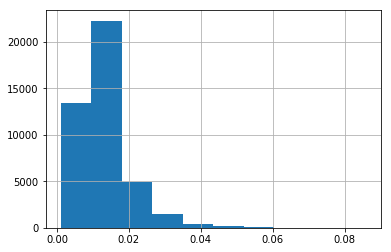

In [88]:
#Try a few models and see which one is better.
LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)
prediction_LR = LR_model.predict_proba(mailout_test_nonan_dummy_scaled_transformed)
prediction_LR[:,1]
len(prediction_LR[:,1]) #33819
predict_result_LR = pd.DataFrame(data = {'LNR':np.array(mailout_test_LNR), 'RESPONSE':prediction_LR[:,1]})
predict_result_LR.to_csv('predict_result_lr.csv', index = False)
print(predict_result_LR.sort_values(by = 'RESPONSE', ascending = False))
predict_result_LR['RESPONSE'].hist()

C:\Users\Nancy Zhao\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


         LNR  RESPONSE
41924  42217       0.5
25505  16640       0.5
26646  26105       0.5
10032  51918       0.4
12762  58910       0.4
39793   4151       0.4
26084  47342       0.4
40968  16451       0.4
6601   26447       0.4
5562   31656       0.4
25220  72350       0.4
1018   12727       0.4
9501   11944       0.4
22678  10119       0.4
6175   79495       0.4
24052  35020       0.4
33526   5792       0.4
4702   82464       0.4
32552  60978       0.4
23704  76252       0.4
12542  10074       0.4
16051   3649       0.4
11376  67958       0.4
35666  20873       0.4
19925  23140       0.4
10774   2770       0.4
36896  81719       0.4
32203  19646       0.4
903     4124       0.4
8757   66250       0.4
...      ...       ...
15841  65532       0.0
15842  61703       0.0
15844  62018       0.0
15846  62344       0.0
15847  62660       0.0
15848  62664       0.0
15849  63951       0.0
15850  64260       0.0
15851  64894       0.0
15852  64897       0.0
15853  65217       0.0
15835  6489

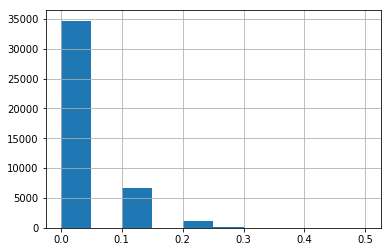

In [89]:
RF_model = RandomForestClassifier()
RF_model.fit(x_train, y_train)
prediction_RF = RF_model.predict_proba(mailout_test_nonan_dummy_scaled_transformed)
prediction_RF[:,1]
len(prediction_RF[:,1]) #33819
predict_result_RF = pd.DataFrame(data = {'LNR':np.array(mailout_test_LNR), 'RESPONSE':prediction_RF[:,1]})
predict_result_RF.to_csv('predict_result_RF.csv', index = False)
print(predict_result_RF.sort_values(by = 'RESPONSE', ascending = False))
predict_result_RF['RESPONSE'].hist()

         LNR  RESPONSE
41924  42217       0.5
25505  16640       0.5
26646  26105       0.5
10032  51918       0.4
12762  58910       0.4
39793   4151       0.4
26084  47342       0.4
40968  16451       0.4
6601   26447       0.4
5562   31656       0.4
25220  72350       0.4
1018   12727       0.4
9501   11944       0.4
22678  10119       0.4
6175   79495       0.4
24052  35020       0.4
33526   5792       0.4
4702   82464       0.4
32552  60978       0.4
23704  76252       0.4
12542  10074       0.4
16051   3649       0.4
11376  67958       0.4
35666  20873       0.4
19925  23140       0.4
10774   2770       0.4
36896  81719       0.4
32203  19646       0.4
903     4124       0.4
8757   66250       0.4
...      ...       ...
15841  65532       0.0
15842  61703       0.0
15844  62018       0.0
15846  62344       0.0
15847  62660       0.0
15848  62664       0.0
15849  63951       0.0
15850  64260       0.0
15851  64894       0.0
15852  64897       0.0
15853  65217       0.0
15835  6489

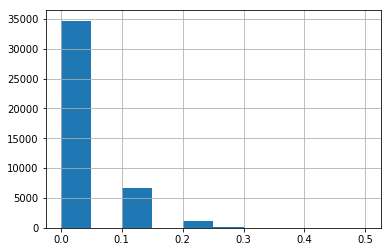

In [90]:
KN_model  = KNeighborsClassifier()
KN_model.fit(x_train, y_train)
prediction_KN = KN_model.predict_proba(mailout_test_nonan_dummy_scaled_transformed)
prediction_KN[:,1]
len(prediction_KN[:,1]) #33819
predict_result_KN = pd.DataFrame(data = {'LNR':np.array(mailout_test_LNR), 'RESPONSE':prediction_RF[:,1]})
predict_result_KN.to_csv('predict_result_KN.csv', index = False)
print(predict_result_KN.sort_values(by = 'RESPONSE', ascending = False))
predict_result_KN['RESPONSE'].hist()

         LNR  RESPONSE
30949  22998  0.501777
24647  55875  0.499801
18439  84578  0.499078
34379  52205  0.498274
2766   37811  0.497961
27254  20833  0.497850
23248  85145  0.497251
30311  35524  0.497081
3391   18009  0.495907
2343   30957  0.495473
22031  26346  0.495425
10794  12557  0.495347
35836  16444  0.495085
19193  14887  0.495024
37504  28388  0.495023
20097  38303  0.494912
15739   3774  0.494653
39808   3964  0.494607
18      2215  0.494548
26508  63236  0.494513
33844  74442  0.494263
9981   45051  0.493846
17994  82316  0.493468
32428   4257  0.493433
25045  15636  0.493296
41745  40340  0.493265
28776  15879  0.493173
33411  44269  0.493169
36896  81719  0.492934
2003   83989  0.492899
...      ...       ...
29966  76610  0.171987
40680  62422  0.171718
35643  19715  0.171601
37487  27683  0.171516
41049   7665  0.171148
36299   6594  0.170699
17298  66270  0.170523
32114  74375  0.170498
2240   20721  0.170496
10089   4103  0.170327
28004  49107  0.169686
11439  2056

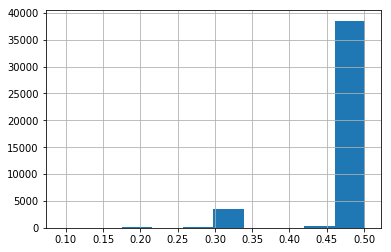

In [91]:
ADA_model = AdaBoostClassifier()
ADA_model.fit(x_train, y_train)
prediction_ADA = ADA_model.predict_proba(mailout_test_nonan_dummy_scaled_transformed)
prediction_ADA[:,1]
len(prediction_ADA[:,1]) #33819
predict_result_ADA = pd.DataFrame(data = {'LNR':np.array(mailout_test_LNR), 'RESPONSE':prediction_ADA[:,1]})
predict_result_ADA.to_csv('predict_result_ADA.csv', index = False)
print(predict_result_ADA.sort_values(by = 'RESPONSE', ascending = False))
predict_result_ADA['RESPONSE'].hist()

         LNR  RESPONSE
5151   14930  0.422873
6343   54171  0.421111
27254  20833  0.420814
39751  33593  0.420135
19317  43290  0.419640
7979    7911  0.419592
30949  22998  0.419189
28776  15879  0.419058
1242   42237  0.418930
18544  76440  0.418273
27699  48895  0.417948
31922  69089  0.417644
23992  54875  0.417365
4837   64121  0.417365
41688   8826  0.417364
29854  34406  0.417139
20757  33748  0.416941
38272  43018  0.416856
18374  80215  0.416701
24647  55875  0.416395
804    13600  0.416287
18211  18936  0.416287
8395    6858  0.416089
18439  84578  0.415969
19123  64471  0.415904
38794   2797  0.415889
6131   23143  0.415868
11383  10627  0.415868
21536   7480  0.415808
4055   38643  0.415715
...      ...       ...
32114  74375  0.224107
16626  62482  0.223544
37487  27683  0.223398
40680  62422  0.221958
10089   4103  0.221493
28004  49107  0.221115
35643  19715  0.219796
36299   6594  0.218742
11439  20561  0.217624
39298  75425  0.217519
2240   20721  0.212598
41049   766

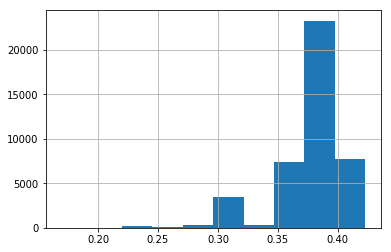

In [92]:
ADA_model = AdaBoostClassifier(learning_rate = 0.1,n_estimators = 100, random_state = 5 )
ADA_model.fit(x_train, y_train)
prediction_ADA = ADA_model.predict_proba(mailout_test_nonan_dummy_scaled_transformed)
prediction_ADA[:,1]
len(prediction_ADA[:,1]) #33819
predict_result_ADA = pd.DataFrame(data = {'LNR':np.array(mailout_test_LNR), 'RESPONSE':prediction_ADA[:,1]})
predict_result_ADA.to_csv('predict_result_ADA_new3.csv', index = False)
print(predict_result_ADA.sort_values(by = 'RESPONSE', ascending = False))
predict_result_ADA['RESPONSE'].hist()